In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn import linear_model
from numpy import genfromtxt
import scipy.stats as st
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold #k fold cross-validation
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn import metrics
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor

# Q1

## Data Import 

In [3]:
data_all = pd.read_csv("data_with_varnum.csv",index_col=0)
data_all.dropna(inplace = True)
data_all

Variant  Variant_number    length  Country_digit          GDP  type  \
0       Ovni 395       -0.099432 -0.813886             21  34768.17590     0   
1     38 Cruiser       -0.104543 -1.474761             15  10634.23578     0   
2     38 Cruiser       -0.104543 -1.474761             15  10634.23578     0   
3     38 Cruiser       -0.104543 -1.474761             15  10634.23578     0   
4     38 Cruiser       -0.104543 -1.474761             15  10634.23578     0   
...          ...             ...       ...            ...          ...   ...   
3356          50       -0.063654  0.728155             25  19144.28439     1   
3357          50       -0.063654  0.728155             25  19144.28439     1   
3358         5.4       -0.050024  2.380342             25  19144.28439     1   
3359         5.4       -0.050024  2.380342             34  33673.75096     1   
3360    Series 5       -0.063654  2.490488             20  49813.00000     1   

      Caribbean  Europe  USA  2005  ...  2014  2015  2016  2017  2018  2019  \
0             0       1    0     1  ...     0     0     0     0     0     0   
1             0       1    0     1  ...     0     0     0     0     0     0   
2             0       1    0     1  ...     0     0     0     0     0     0   
3             0       1    0     1  ...     0     0     0     0     0     0   
4             0       1    0     1  ...     0     0     0     0     0     0   
...         ...     ...  ...   ...  ...   ...   ...   ...   ...   ...   ...   
3356          0       1    0     0  ...     0     0     0     0     0     1   
3357          0       1    0     0  ...     0     0     0     0     0     1   
3358          0       1    0     0  ...     0     0     0     0     0     1   
3359          0       1    0     0  ...     0     0     0     0     0     1   
3360          0       0    1     0  ...     0     0     0     0     0     1   

      MV_expensive  C_expensive  Variant_transform  Listing Price (USD)  
0                0            0                339               267233  
1               -1            0                 17                75178  
2               -1            0                 17                66825  
3               -1            0                 17                54661  
4               -1            0                 17                53447  
...            ...          ...                ...                  ...  
3356             0            0                188               789584  
3357             0            0                188               788937  
3358             0            0                187              1246325  
3359             0            0                187               811143  
3360             0            0                365              1495000  

[3347 rows x 28 columns]

In [23]:
data_no_duplicate = pd.read_csv("data_without_duplicates.csv",index_col=0)
data_no_duplicate.dropna(inplace = True)
data_no_duplicate

Variant  Variant_number    length  Country_digit          GDP  type  \
0       Ovni 395       -0.194840 -1.474761             11  47970.21429     0   
1     38 Cruiser       -0.194840 -1.474761             41  50801.50000     0   
2     38 Cruiser       -0.194840 -1.474761             70  43473.00000     0   
3     38 Cruiser       -0.194840 -1.474761             78  43194.00000     0   
4     38 Cruiser       -0.194840 -1.474761             11  47970.21429     0   
...          ...             ...       ...            ...          ...   ...   
3350          46       14.417968 -0.373303             20  45928.00000     0   
3351          46       14.417968 -0.373303             58  47653.00000     0   
3352         50F       14.758712  0.067280             47  41994.71353     0   
3353         50F       14.758712  0.067280             58  46960.57143     0   
3354         50F       14.758712  0.067280             13  58218.00000     0   

      Caribbean  Europe  USA  2005  ...  2013  2014  2015  2016  2017  2018  \
0             0       0    1     0  ...     0     0     0     0     0     0   
1             0       0    1     0  ...     0     0     0     0     0     0   
2             0       0    1     0  ...     0     0     0     0     0     0   
3             0       0    1     0  ...     0     0     0     0     0     0   
4             0       0    1     0  ...     0     0     0     0     0     0   
...         ...     ...  ...   ...  ...   ...   ...   ...   ...   ...   ...   
3350          0       0    1     0  ...     0     0     0     0     1     0   
3351          0       0    1     0  ...     0     0     0     0     0     1   
3352          0       1    0     1  ...     0     0     0     0     0     0   
3353          0       0    1     1  ...     0     0     0     0     0     0   
3354          0       0    1     0  ...     0     0     0     0     0     0   

      2019  MV_expensive  C_expensive  Listing Price (USD)  
0        0             0            0             129900.0  
1        0             0            0             129000.0  
2        0             0            0             134900.0  
3        0             0            0             165000.0  
4        0             0            0             144900.0  
...    ...           ...          ...                  ...  
3350     0             0            0             485000.0  
3351     0             0            1             497000.0  
3352     0             0            0             302459.0  
3353     0             0            1             345000.0  
3354     0             0            0             349000.0  

[3005 rows x 27 columns]

In [5]:
data_var = pd.read_csv("final_data(delete variant==1).csv")
data_var.dropna(inplace = True)
data_var

Variant  Variant_number    length  Country_digit          GDP  type  \
0       Ovni 395       -0.099432 -0.813886             21  34768.17590     0   
1     38 Cruiser       -0.104543 -1.474761             15  10634.23578     0   
2     38 Cruiser       -0.104543 -1.474761             15  10634.23578     0   
3     38 Cruiser       -0.104543 -1.474761             15  10634.23578     0   
4     38 Cruiser       -0.104543 -1.474761             15  10634.23578     0   
...          ...             ...       ...            ...          ...   ...   
3189          50       -0.063654  0.728155             25  19144.28439     1   
3190          50       -0.063654  0.728155             25  19144.28439     1   
3191         5.4       -0.050024  2.380342             25  19144.28439     1   
3192         5.4       -0.050024  2.380342             34  33673.75096     1   
3193    Series 5       -0.063654  2.490488             20  49813.00000     1   

      Caribbean  Europe  USA  2005  ...  2013  2014  2015  2016  2017  2018  \
0             0       1    0     1  ...     0     0     0     0     0     0   
1             0       1    0     1  ...     0     0     0     0     0     0   
2             0       1    0     1  ...     0     0     0     0     0     0   
3             0       1    0     1  ...     0     0     0     0     0     0   
4             0       1    0     1  ...     0     0     0     0     0     0   
...         ...     ...  ...   ...  ...   ...   ...   ...   ...   ...   ...   
3189          0       1    0     0  ...     0     0     0     0     0     0   
3190          0       1    0     0  ...     0     0     0     0     0     0   
3191          0       1    0     0  ...     0     0     0     0     0     0   
3192          0       1    0     0  ...     0     0     0     0     0     0   
3193          0       0    1     0  ...     0     0     0     0     0     0   

      2019  MV_expensive  C_expensive  Listing Price (USD)  
0        0             0            0               267233  
1        0            -1            0                75178  
2        0            -1            0                66825  
3        0            -1            0                54661  
4        0            -1            0                53447  
...    ...           ...          ...                  ...  
3189     1             0            0               789584  
3190     1             0            0               788937  
3191     1             0            0              1246325  
3192     1             0            0               811143  
3193     1             0            0              1495000  

[3183 rows x 27 columns]

## Data division

In [4]:
data1 = np.array(data_all)
x1 = data1[:,1:-1]
y1 = data1[:,-1]
train_x1,test_x1,train_y1,test_y1 = train_test_split(x1,y1,test_size=0.15,random_state=0)

In [24]:
data2 = np.array(data_no_duplicate)
x2 = data2[:,1:-1]
y2 = data2[:,-1]
train_x2,test_x2,train_y2,test_y2 = train_test_split(x2,y2,test_size=0.15,random_state=0)

In [10]:
data3 = np.array(data_var)
x3 = data3[:,1:-1]
y3 = data3[:,-1]
train_x3,test_x3,train_y3,test_y3 = train_test_split(x3,y3,test_size=0.15,random_state=0)

## Gradient Boost + Grid Search

In [5]:
def performance_metric(y_true, y_predict):
    score = r2_score(y_true,y_predict)
    return score

def fit_model(x, y):
    cross_validator = KFold(n_splits=3,shuffle=True, random_state=500) #交叉验证
    regressor = GradientBoostingRegressor(random_state=500,max_features=None,min_samples_leaf=4, min_samples_split=5,learning_rate=0.5)
    params = {'max_depth':range(1,30)}  #决策树最大深度
    scoring_fnc = make_scorer(performance_metric)   # 评分函数
    grid = GridSearchCV(regressor,params,cv=cross_validator,scoring=scoring_fnc)
    grid = grid.fit(x, y)
    return grid.best_estimator_

def model_imge(model,test_x,test_y):
    pre_y = model.predict(test_x)
    r2 = performance_metric(test_y,pre_y)  
    print("R^2:", r2)
    plt.figure(figsize=(20,9),dpi=100)
    plt.plot(test_y,"go-",label='true value')
    plt.plot(pre_y,"ro-",label='predict value')
    plt.legend()
    plt.title('comparison between GBR true value and predict value')
    plt.show()
    importance = model.feature_importances_
    return pre_y, importance

### data_all

R^2: 0.8418790911584697


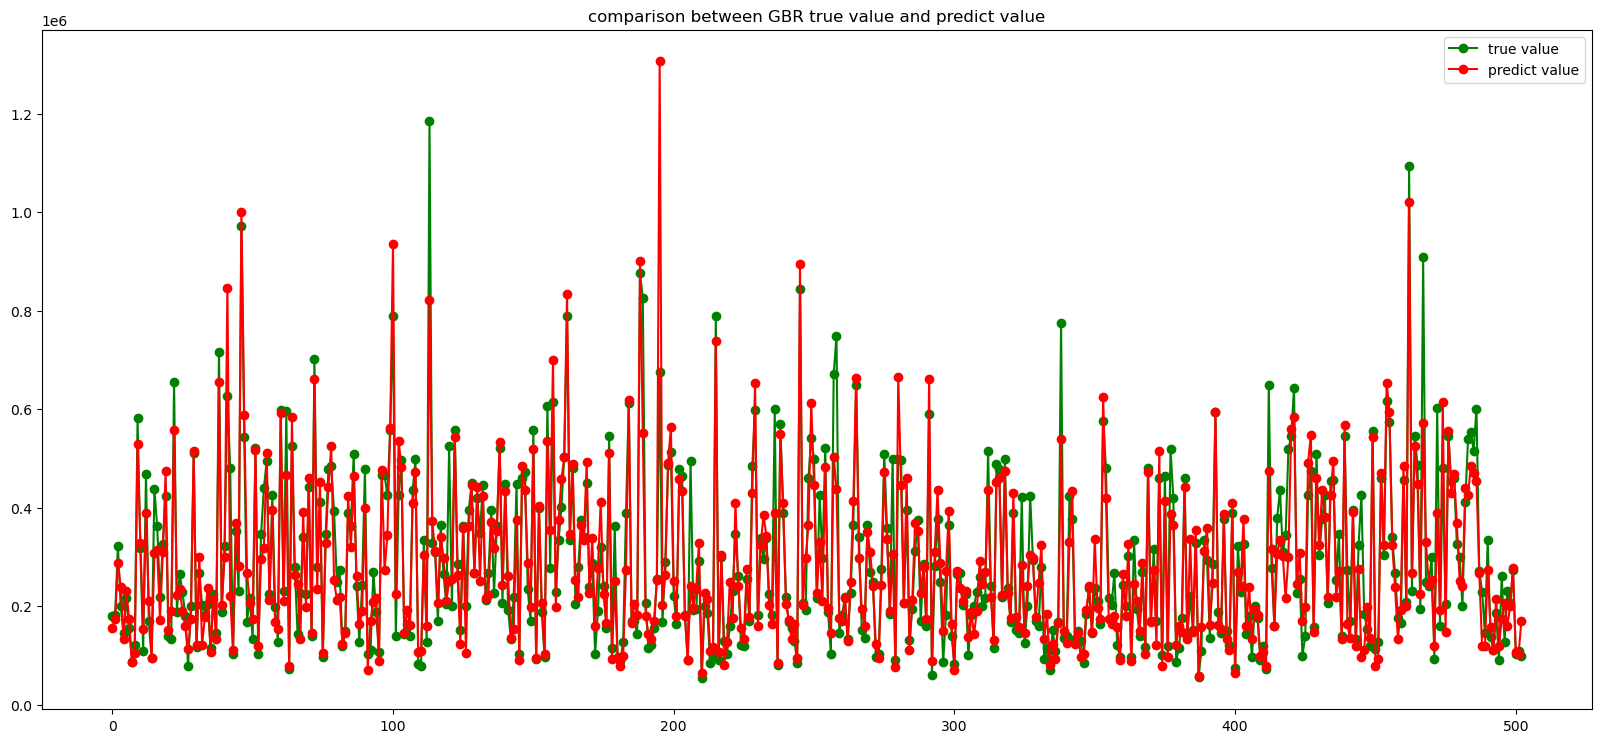

In [6]:
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
clf11 = fit_model(train_x1,train_y1)
pre_y_GB1, importances_GB1 = model_imge(clf11,test_x1,test_y1)

### data_no_duplicate

R^2: 0.8005631899009468


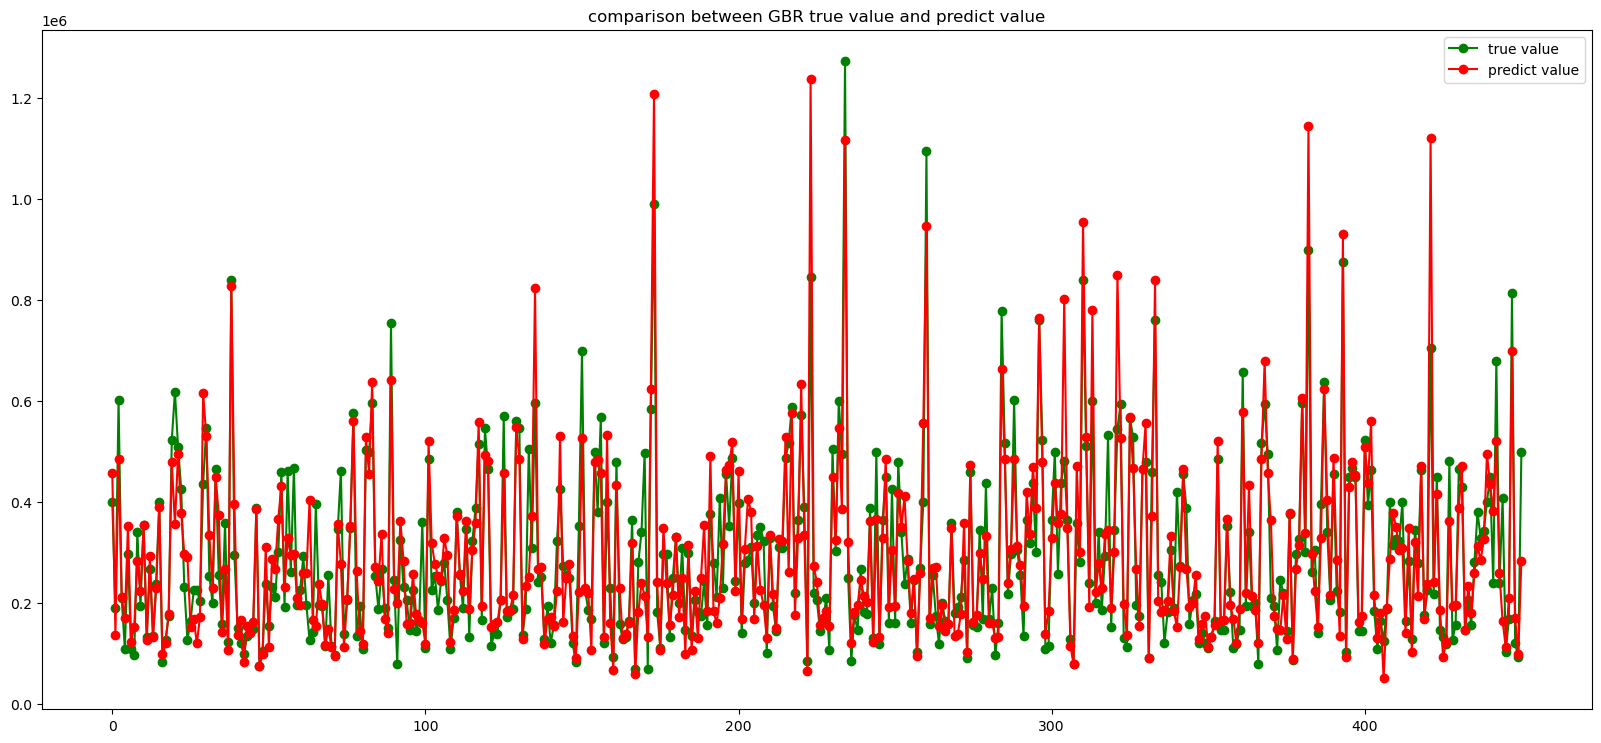

In [35]:
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
clf12 = fit_model(train_x2,train_y2)
pre_y_GB2, importances_GB2 = model_imge(clf12,test_x2,test_y2)

### data_var

R^2: 0.8230628501707291


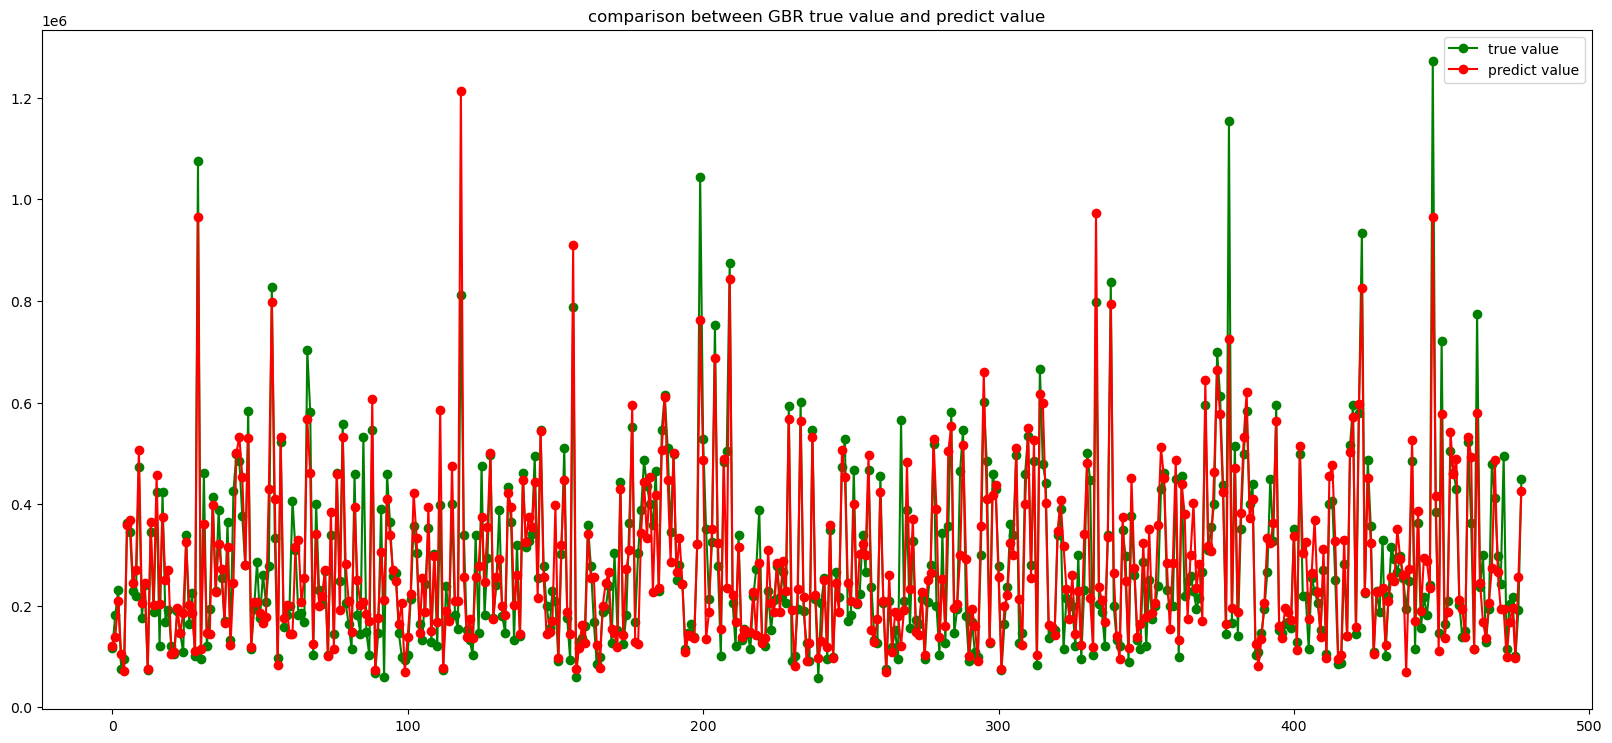

In [36]:
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
clf13 = fit_model(train_x3,train_y3)
pre_y_GB3, importances_GB3 = model_imge(clf13,test_x3,test_y3)

## feature selection 

In [7]:
XX = data_all.drop(columns = ["Listing Price (USD)","Variant"])
col = list(XX.columns.values)

indices = np.argsort(importances_GB1)[::-1]
list01 = []
list02 = []
for f in range(XX.shape[1]):
    # 对于最后需要逆序排序，我认为是做了类似决策树回溯的取值，从叶子收敛到根，根部重要程度高于叶子。
    print("%2d) %-*s %f" % (f + 1, 30, col[indices[f]], importances_GB1[indices[f]]))
    list01.append(col[indices[f]])
    list02.append(importances_GB1[indices[f]])

importances = list(importances_GB1)
feature_list = list(XX.columns)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)
x_values = list(range(len(importances)))
print(x_values)

 1) type                           0.375860
 2) length                         0.287288
 3) Variant_number                 0.062811
 4) Variant_transform              0.060864
 5) GDP                            0.039811
 6) 2018                           0.037693
 7) MV_expensive                   0.031939
 8) 2019                           0.029948
 9) Country_digit                  0.016431
10) 2017                           0.015668
11) 2015                           0.006866
12) 2016                           0.005754
13) 2008                           0.004427
14) 2006                           0.004124
15) USA                            0.003237
16) 2005                           0.003199
17) 2007                           0.003073
18) Europe                         0.002986
19) 2009                           0.001616
20) C_expensive                    0.001467
21) 2014                           0.001328
22) 2010                           0.001282
23) 2011                        

R^2: 0.8492427195741019


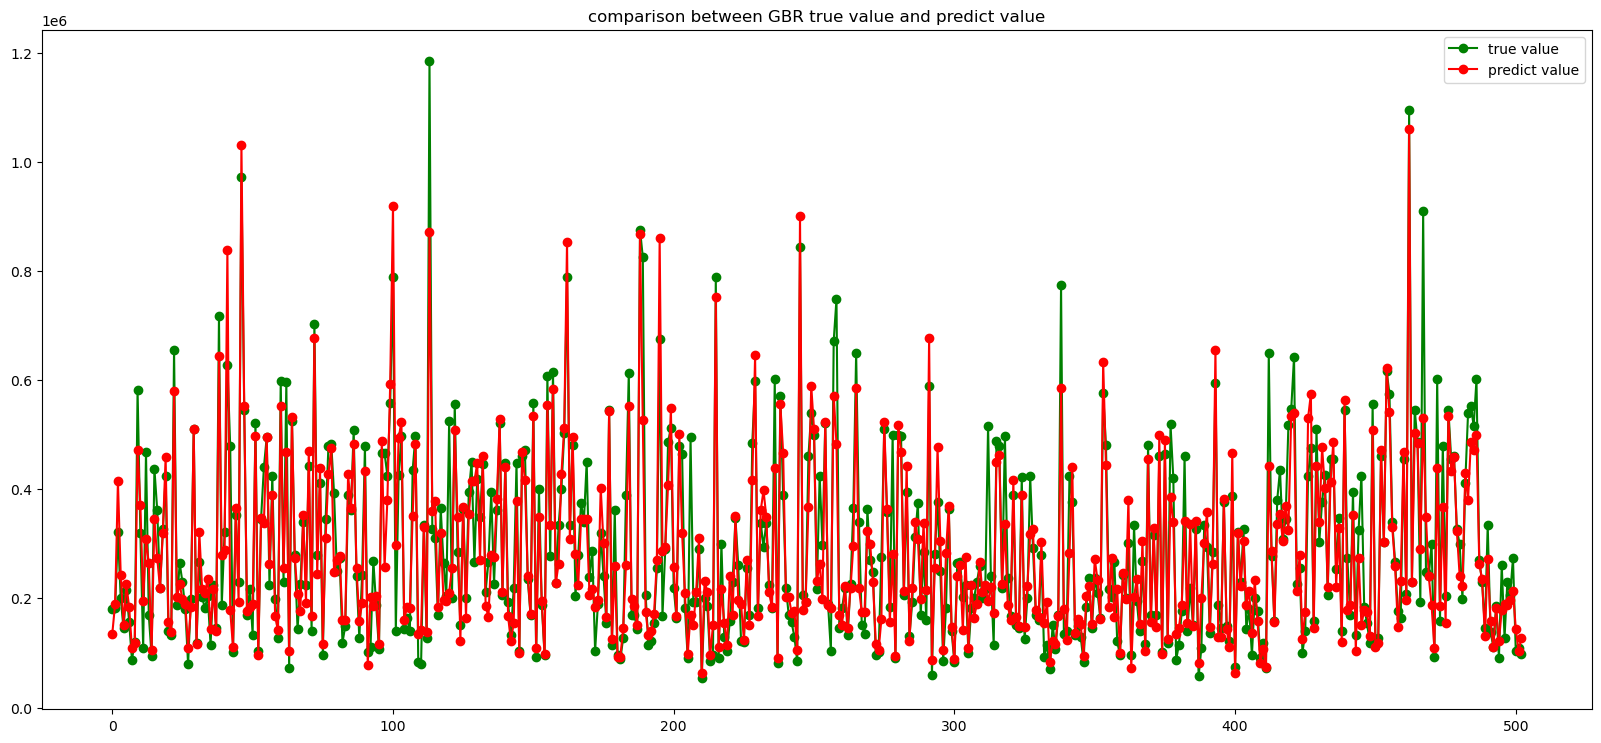

In [10]:
## delete less important 
data_truncate = data_all.loc[:,["Variant",'Variant_number','Variant_transform', 'length', 'Country_digit', 'GDP', 'type', '2005', '2006', '2007', '2008', '2009',
       '2010', '2013', '2015', '2016', '2017', '2018',
       '2019', 'MV_expensive', 'C_expensive','Listing Price (USD)']]
data = np.array(data_all)
xt = data_all.loc[:,['Variant_number', 'length', 'Country_digit', 'GDP', 'type', '2005', '2006', '2007', '2008', '2009',
       '2010', '2013',  '2015', '2016', '2017', '2018',
       '2019', 'MV_expensive', 'C_expensive']].values.tolist()
yt = data[:,-1]
train_xt,test_xt,train_yt,test_yt = train_test_split(xt,yt,test_size=0.15,random_state=0)
clf_t = fit_model(train_xt,train_yt)
pre_y_GBt, importances_GB_t = model_imge(clf_t,test_xt,test_yt)

### visualizing difference

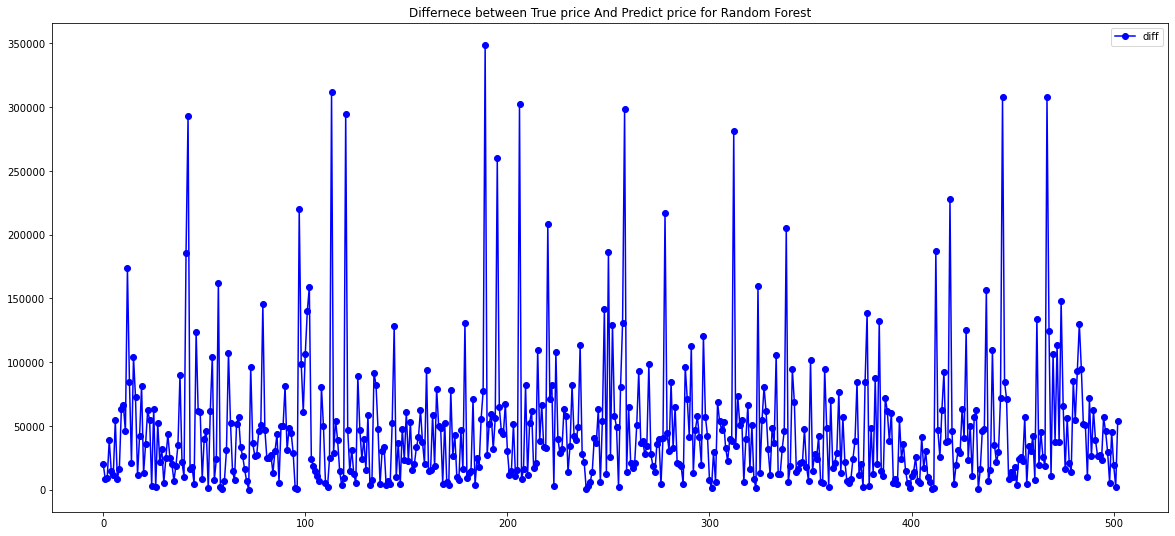

In [32]:
da = []
for i in range(len(pre_y_GBt)):
    d = abs(pre_y_GBt[i] - test_yt[i])
    da.append(d)
plt.figure(figsize=(20,9))
plt.plot(np.arange(len(da[:1000])), da[:1000], "bo-", label="diff")
plt.title("Differnece between True price And Predict price for GBR")
plt.legend()

## Correlation

### Relation between price and other features

<AxesSubplot:xlabel='length', ylabel='Listing Price (USD)'>

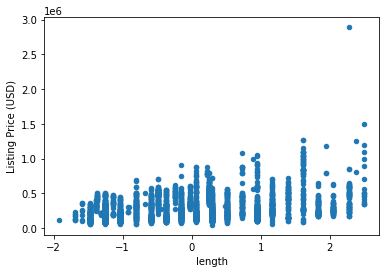

In [38]:
var1 = "length"
d = pd.concat([data_all["Listing Price (USD)"], data_all[var1]], axis = 1)
data_all.plot.scatter(x = var1, y = "Listing Price (USD)")

<AxesSubplot:xlabel='Variant_number', ylabel='Listing Price (USD)'>

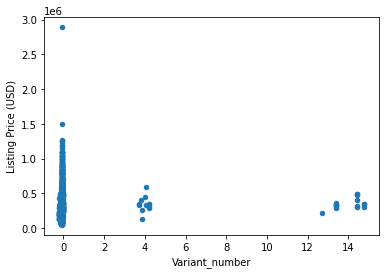

In [39]:
var1 = "Variant_number"
d = pd.concat([data_all["Listing Price (USD)"], data_all[var1]], axis = 1)
data_all.plot.scatter(x = var1, y = "Listing Price (USD)")

In [ ]:
var1 = "GDP"
d = pd.concat([data_all["Listing Price (USD)"], data_all[var1]], axis = 1)
data_all.plot.scatter(x = var1, y = "Listing Price (USD)")

In [ ]:
var1 = "MV_expensive"
d = pd.concat([data_all["Listing Price (USD)"], data_all[var1]], axis = 1)
data_all.plot.scatter(x = var1, y = "Listing Price (USD)")

### Heat Map based on correation

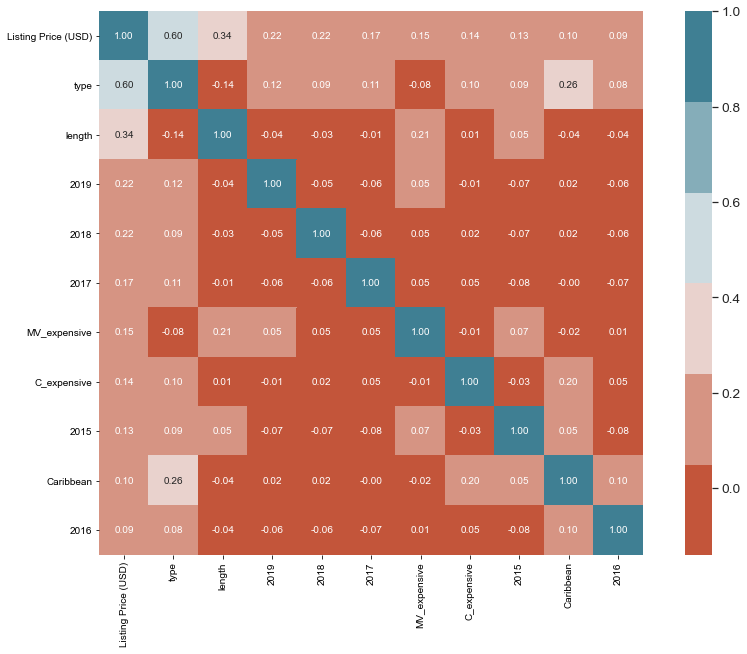

In [40]:
k  = 11 
cols = data_all.corr().nlargest(k, 'Listing Price (USD)')['Listing Price (USD)'].index
cm = np.corrcoef(data_all[cols].values.T)
fig,ax = plt.subplots(figsize=(15,10))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,
                 fmt='.2f',  
                 cmap=sns.diverging_palette(20, 220),
                 annot_kws={'size': 10}, 
                 yticklabels=cols.values,
                 xticklabels=cols.values)
plt.show()

## Random forest Regressor + Grid Search

In [8]:
def performance_metric(y_true, y_predict):
    score = r2_score(y_true,y_predict)
    return score
param_grid = [
        {'n_estimators': [3, 10, 30], 'max_features': [2, 3, 4, 6, 8]},
        {'bootstrap': [False]},
]
def fit_model(x, y):
    cross_validator = KFold(n_splits=3,shuffle=True, random_state=500) #cross-validation
    regressor = RandomForestRegressor()
    scoring_fnc = make_scorer(performance_metric)   
    grid = GridSearchCV(regressor, param_grid, cv=cross_validator,scoring=scoring_fnc)
    grid = grid.fit(x, y)
    return grid.best_estimator_

### data_no_duplicate

R^: 0.8367004996818925
Mean Absolute Error: 47423.23572182059
Mean Squared Error: 5177391235.459799
Root Mean Squared Error: 71954.09116554665


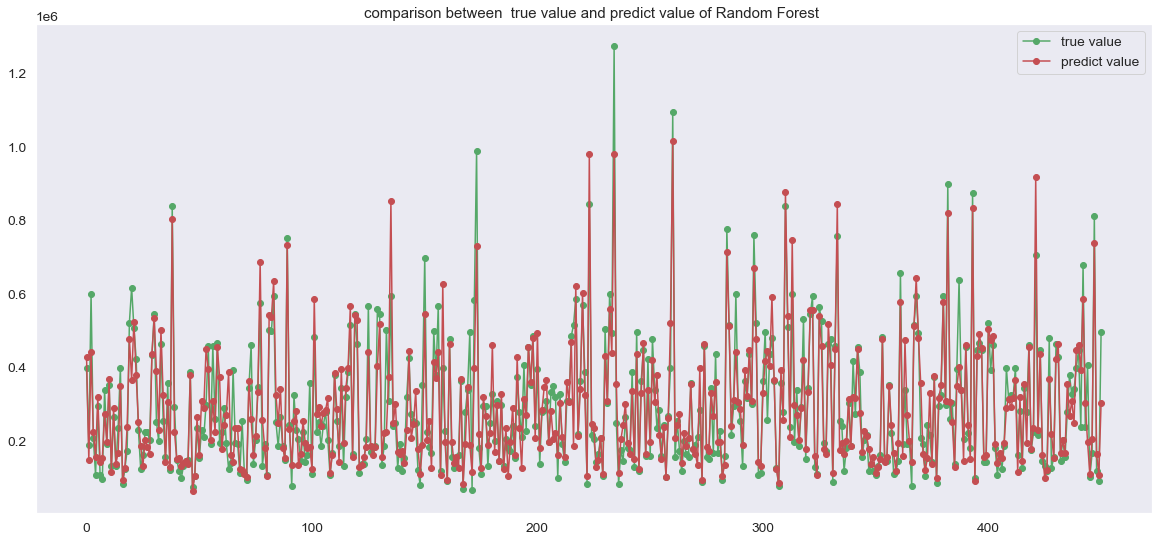

In [153]:
clf22 = fit_model(train_x2, train_y2)
y_pred_rf2 = clf22.predict(test_x2)
r2 = performance_metric(test_y2,y_pred_rf2)  
print("R^:",r2)
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y2, y_pred_rf2))
print('Mean Squared Error:', metrics.mean_squared_error(test_y2, y_pred_rf2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y2, y_pred_rf2)))
plt.figure(figsize=(20,9))
plt.plot(np.arange(len(test_y2)),test_y2,"go-",label='true value')
plt.plot(np.arange(len(y_pred_rf2)),y_pred_rf2,"ro-",label='predict value')
plt.legend()
plt.grid(False)
plt.title('comparison between  true value and predict value of Random Forest ')
plt.show()

### data_var

R^: 0.8406050852892322
Mean Absolute Error: 46753.10128300863
Mean Squared Error: 5199078409.449873
Root Mean Squared Error: 72104.63514539044


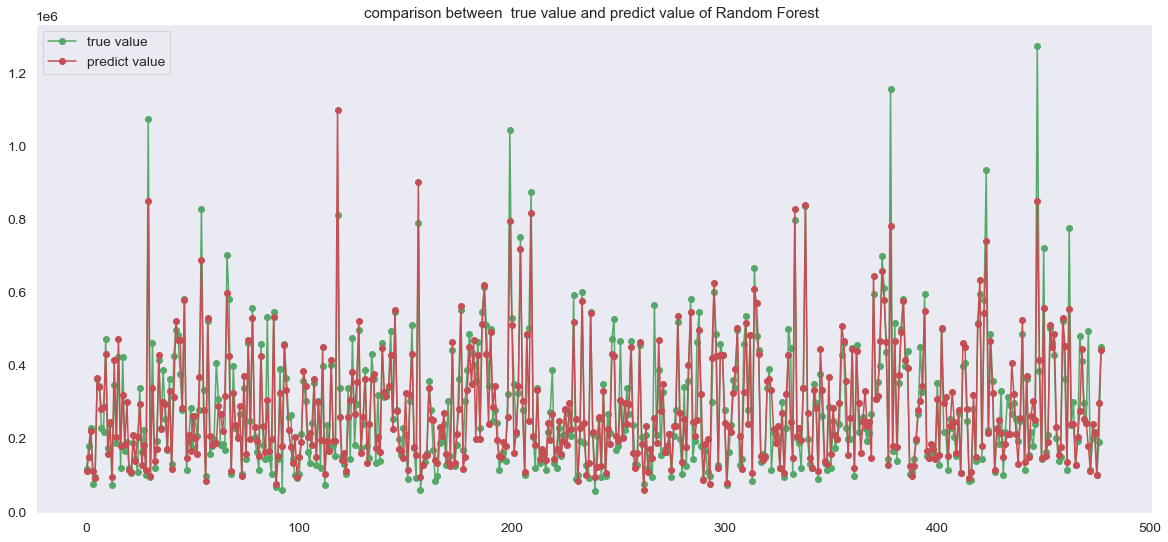

In [154]:
clf23 = fit_model(train_x3, train_y3)
y_pred_rf3 = clf23.predict(test_x3)
r2 = performance_metric(test_y3,y_pred_rf3)  
print("R^:",r2)
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y3, y_pred_rf3))
print('Mean Squared Error:', metrics.mean_squared_error(test_y3, y_pred_rf3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y3, y_pred_rf3)))
plt.figure(figsize=(20,9))
plt.plot(np.arange(len(test_y3)),test_y3,"go-",label='true value')
plt.plot(np.arange(len(y_pred_rf3)),y_pred_rf3,"ro-",label='predict value')
plt.legend()
plt.grid(False)
plt.title('comparison between  true value and predict value of Random Forest ')
plt.show()

### data_all

R^: 0.8651627972184329
Mean Absolute Error: 41161.90046308141
Mean Squared Error: 4342524502.134376
Root Mean Squared Error: 65897.83381974233


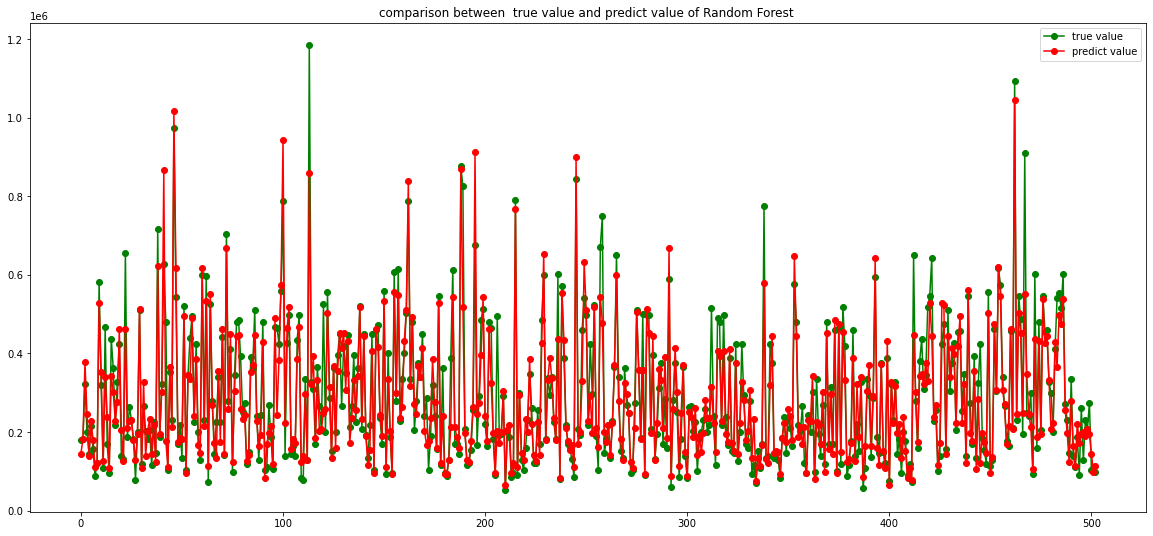

In [9]:
clf21 = fit_model(train_x1, train_y1)
y_pred_rf1 = clf21.predict(test_x1)
r2 = performance_metric(test_y1,y_pred_rf1)  
print("R^:",r2)
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y1, y_pred_rf1))
print('Mean Squared Error:', metrics.mean_squared_error(test_y1, y_pred_rf1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred_rf1)))
plt.figure(figsize=(20,9))
plt.plot(np.arange(len(test_y1)),test_y1,"go-",label='true value')
plt.plot(np.arange(len(y_pred_rf1)),y_pred_rf1,"ro-",label='predict value')
plt.legend()
plt.title('comparison between  true value and predict value of Random Forest ')
plt.show()

#### data_all truncate

R^: 0.8512511531716256
Mean Absolute Error: 44680.72448899629
Mean Squared Error: 4790558530.518205
Root Mean Squared Error: 69213.86082655846


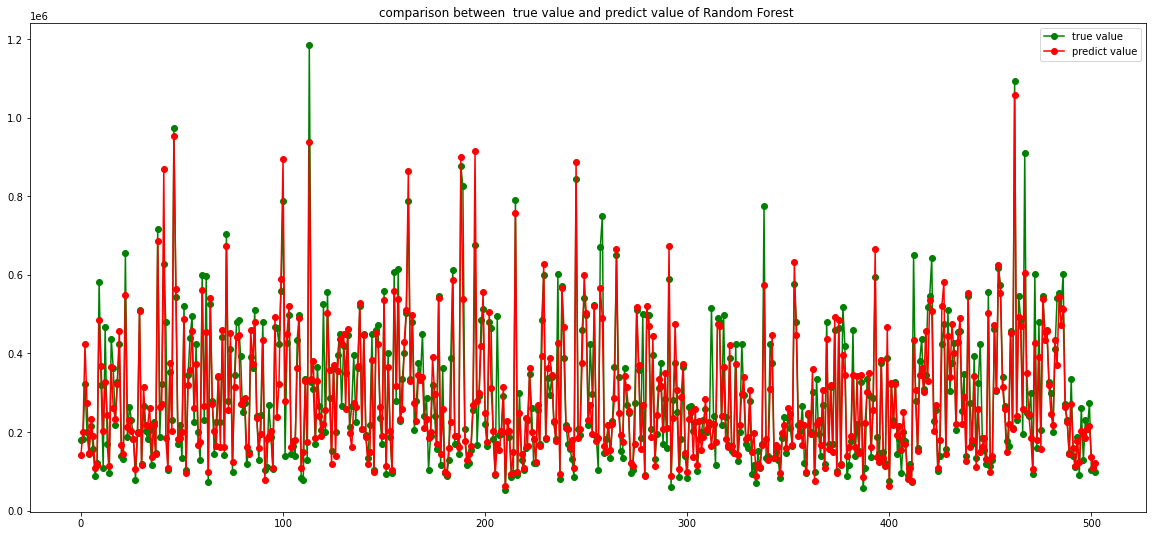

In [11]:
clf2t = fit_model(train_xt, train_yt)
y_pred_rft = clf2t.predict(test_xt)
r2 = performance_metric(test_yt,y_pred_rft)  
print("R^:",r2)
print('Mean Absolute Error:', metrics.mean_absolute_error(test_yt, y_pred_rft))
print('Mean Squared Error:', metrics.mean_squared_error(test_yt, y_pred_rft))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_yt, y_pred_rft)))
plt.figure(figsize=(20,9))
plt.plot(np.arange(len(test_yt)),test_yt,"go-",label='true value')
plt.plot(np.arange(len(y_pred_rft)),y_pred_rft,"ro-",label='predict value')
plt.grid(False)
plt.legend()
plt.title('comparison between  true value and predict value of Random Forest ')
plt.show()

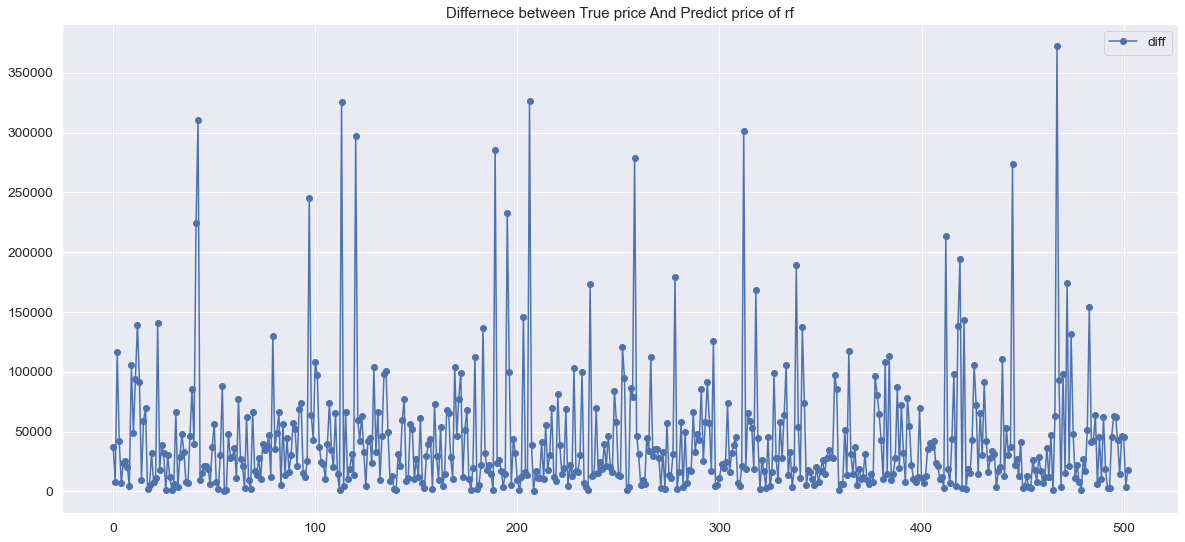

In [63]:
da = []
for i in range(len(y_pred_rft)):
    d = abs(y_pred_rft[i] - test_yt[i])
    da.append(d)
plt.figure(figsize=(20,9))
plt.plot(np.arange(len(da[:1000])), da[:1000], "bo-", label="diff")
plt.title("Differnece between True price And Predict price of rf")
plt.legend()

## Ensembling Model

### Truncate data

In [77]:
lr = LinearRegression()  #0.85
# lr = RandomForestRegressor() #0.84
# lr = Ridge() #0.85
# lr = Lasso() #0.85
# lr = MLPRegressor() #0.86
# lr = DecisionTreeRegressor() #0.84
# lr = AdaBoostRegressor() #0.83
# lr = GradientBoostingRegressor() #0.85
# lr = BaggingRegressor() #0.85
sclft = StackingRegressor(regressors=[clf_t, clf2t], 
                          meta_regressor=lr)
sclft = sclft.fit(train_xt, train_yt)
for clf, label in zip([clf_t, clf2t, sclft], 
                      ['Gradient Boost', 
                       'Random Forest', 
                       'StackingRegressor']):
    pre_y = clf.predict(test_xt)
    scores = performance_metric(test_yt,pre_y)  
    print("R-square: %0.8f (+/- %0.8f) [%s]" 
          % (scores.mean(), scores.std(), label))

R-square: 0.83980539 (+/- 0.00000000) [Gradient Boost]
R-square: 0.85412130 (+/- 0.00000000) [Random Forest]
R-square: 0.85513626 (+/- 0.00000000) [StackingRegressor]


In [137]:
## GridSearch
lr = GradientBoostingRegressor()  #0.85
sclft = StackingRegressor(regressors=[clf_t, clf2t], 
                          meta_regressor=lr)
# params = {
#     'meta_regressor__alpha': [0.1, 1.0, 10.0],
#     }
params = {'meta_regressor__learning_rate': [0.1, 0.3, 0.5, 0.7], 'meta_regressor__max_features': range(1, 5), 
              'meta_regressor__subsample': [0.1, 0.3, 0.5, 0.7], 'meta_regressor__n_estimators': range(100, 401, 100)}
# params = {'meta_regressor__learning_rate': [0.1, 0.3, 0.5, 0.7], 'meta_regressor__max_features': range(1, 5), 
#         'meta_regressor__n_estimators': range(100, 401, 100)}
# lr = Ridge() #0.85
gridt = GridSearchCV(estimator=sclft, param_grid=params, cv=5, refit=True)
gridt.fit(train_xt, train_yt)
pre_y_stackt = gridt.predict(test_xt)
scorest = performance_metric(test_yt,pre_y_stackt)  
print("R-square: %0.8f (+/- %0.2f)" 
        % (scorest.mean(), scorest.std()))

R-square: 0.85071954 (+/- 0.00)


In [ ]:
### sclft最好

### All data

In [22]:
lr = LinearRegression()  #0.85
# lr = RandomForestRegressor() #0.84
# lr = Ridge() #0.85
# lr = Lasso() #0.85
# lr = MLPRegressor() #0.86
# lr = DecisionTreeRegressor() #0.84
# lr = AdaBoostRegressor() #0.83
# lr = GradientBoostingRegressor() #0.85
# lr = BaggingRegressor() #0.85
sclf1 = StackingRegressor(regressors=[clf11, clf21], 
                          meta_regressor=lr)
sclf1 = sclf1.fit(train_x1, train_y1)
for clf, label in zip([clf11, clf21, sclf1], 
                      ['Gradient Boost', 
                       'Random Forest', 
                       'StackingRegressor']):
    pre_y = clf.predict(test_x1)
    scores = performance_metric(test_y1,pre_y)  
    print("R-square: %0.8f (+/- %0.8f) [%s]" 
          % (scores.mean(), scores.std(), label))

R-square: 0.84187909 (+/- 0.00000000) [Gradient Boost]
R-square: 0.86516280 (+/- 0.00000000) [Random Forest]
R-square: 0.86992237 (+/- 0.00000000) [StackingRegressor]


In [18]:
## GridSearch
lr = GradientBoostingRegressor()  #0.85
sclf1_gs = StackingRegressor(regressors=[clf11, clf21], 
                          meta_regressor=lr)
# params = {
#     'meta_regressor__alpha': [0.1, 1.0, 10.0],
#     }
params = {'meta_regressor__learning_rate': [0.1, 0.3, 0.5, 0.7], 'meta_regressor__max_features': range(1, 5), 
              'meta_regressor__subsample': [0.1, 0.3, 0.5, 0.7], 'meta_regressor__n_estimators': range(100, 401, 100)}
# params = {'meta_regressor__learning_rate': [0.1, 0.3, 0.5, 0.7], 'meta_regressor__max_features': range(1, 5), 
#         'meta_regressor__n_estimators': range(100, 401, 100)}
# lr = Ridge() #0.85
grid = GridSearchCV(estimator=sclf1_gs, param_grid=params, cv=5, refit=True)
grid.fit(train_x1, train_y1)
pre_y_stack1 = grid.predict(test_x1)
scores = performance_metric(test_y1,pre_y_stack1)  
print("R-square: %0.8f (+/- %0.2f)" 
        % (scores.mean(), scores.std()))

KeyboardInterrupt: 

### data_no_duplicate

In [155]:
lr = LinearRegression()  #0.85
# lr = RandomForestRegressor() #0.84
# lr = Ridge() #0.85
# lr = Lasso() #0.85
# lr = MLPRegressor() #0.86
# lr = DecisionTreeRegressor() #0.84
# lr = AdaBoostRegressor() #0.83
# lr = GradientBoostingRegressor() #0.85
# lr = BaggingRegressor() #0.85
sclf2 = StackingRegressor(regressors=[clf12, clf22], 
                          meta_regressor=lr)
sclf2 = sclf2.fit(train_x2, train_y2)
for clf, label in zip([clf12, clf22, sclf2], 
                      ['Gradient Boost', 
                       'Random Forest', 
                       'StackingRegressor']):
    pre_y = clf.predict(test_x2)
    scores = performance_metric(test_y2,pre_y)  
    print("R-square: %0.8f (+/- %0.8f) [%s]" 
          % (scores.mean(), scores.std(), label))

R-square: 0.80056319 (+/- 0.00000000) [Gradient Boost]
R-square: 0.83670050 (+/- 0.00000000) [Random Forest]
R-square: 0.83177563 (+/- 0.00000000) [StackingRegressor]


In [157]:
## GridSearch
lr = GradientBoostingRegressor()  #0.85
sclf2_gs = StackingRegressor(regressors=[clf12, clf22], 
                          meta_regressor=lr)
# params = {
#     'meta_regressor__alpha': [0.1, 1.0, 10.0],
#     }
params = {'meta_regressor__learning_rate': [0.1, 0.3, 0.5, 0.7], 'meta_regressor__max_features': range(1, 5), 
              'meta_regressor__subsample': [0.1, 0.3, 0.5, 0.7], 'meta_regressor__n_estimators': range(100, 401, 100)}
# params = {'meta_regressor__learning_rate': [0.1, 0.3, 0.5, 0.7], 'meta_regressor__max_features': range(1, 5), 
#         'meta_regressor__n_estimators': range(100, 401, 100)}
# lr = Ridge() #0.85
grid2 = GridSearchCV(estimator=sclf2_gs, param_grid=params, cv=5, refit=True)
grid2.fit(train_x2, train_y2)
pre_y_stack2 = grid2.predict(test_x2)
scores2 = performance_metric(test_y2,pre_y_stack2)  
print("R-square: %0.8f (+/- %0.2f)" 
        % (scores2.mean(), scores2.std()))

R-square: 0.84303688 (+/- 0.00)


### data_var

In [156]:
lr = LinearRegression()  #0.85
# lr = RandomForestRegressor() #0.84
# lr = Ridge() #0.85
# lr = Lasso() #0.85
# lr = MLPRegressor() #0.86
# lr = DecisionTreeRegressor() #0.84
# lr = AdaBoostRegressor() #0.83
# lr = GradientBoostingRegressor() #0.85
# lr = BaggingRegressor() #0.85
sclf3 = StackingRegressor(regressors=[clf13, clf23], 
                          meta_regressor=lr)
sclf3 = sclf3.fit(train_x3, train_y3)
for clf, label in zip([clf13, clf23, sclf3], 
                      ['Gradient Boost', 
                       'Random Forest', 
                       'StackingRegressor']):
    pre_y = clf.predict(test_x3)
    scores = performance_metric(test_y3,pre_y)  
    print("R-square: %0.8f (+/- %0.8f) [%s]" 
          % (scores.mean(), scores.std(), label))

R-square: 0.82306285 (+/- 0.00000000) [Gradient Boost]
R-square: 0.84060509 (+/- 0.00000000) [Random Forest]
R-square: 0.83850486 (+/- 0.00000000) [StackingRegressor]


In [158]:
## GridSearch
lr = GradientBoostingRegressor()  #0.85
sclf3_gs = StackingRegressor(regressors=[clf13, clf23], 
                          meta_regressor=lr)
# params = {
#     'meta_regressor__alpha': [0.1, 1.0, 10.0],
#     }
params = {'meta_regressor__learning_rate': [0.1, 0.3, 0.5, 0.7], 'meta_regressor__max_features': range(1, 5), 
              'meta_regressor__subsample': [0.1, 0.3, 0.5, 0.7], 'meta_regressor__n_estimators': range(100, 401, 100)}
# params = {'meta_regressor__learning_rate': [0.1, 0.3, 0.5, 0.7], 'meta_regressor__max_features': range(1, 5), 
#         'meta_regressor__n_estimators': range(100, 401, 100)}
# lr = Ridge() #0.85
grid3 = GridSearchCV(estimator=sclf3_gs, param_grid=params, cv=5, refit=True)
grid3.fit(train_x3, train_y3)
pre_y_stack3 = grid3.predict(test_x3)
scores3 = performance_metric(test_y3,pre_y_stack3)  
print("R-square: %0.8f (+/- %0.2f)" 
        % (scores3.mean(), scores3.std()))

R-square: 0.83283498 (+/- 0.00)


In [ ]:
## GridSearch
clfl = LinearRegression()
lr = GradientBoostingRegressor()  #0.85
sclft = StackingRegressor(regressors=[clfl, clf2t], 
                          meta_regressor=lr)
# params = {
#     'meta_regressor__alpha': [0.1, 1.0, 10.0],
#     }
params = {'meta_regressor__learning_rate': [0.1, 0.3, 0.5, 0.7], 'meta_regressor__max_features': range(1, 5), 
              'meta_regressor__subsample': [0.1, 0.3, 0.5, 0.7], 'meta_regressor__n_estimators': range(100, 401, 100)}
# params = {'meta_regressor__learning_rate': [0.1, 0.3, 0.5, 0.7], 'meta_regressor__max_features': range(1, 5), 
#         'meta_regressor__n_estimators': range(100, 401, 100)}
# lr = Ridge() #0.85 
gridt = GridSearchCV(estimator=sclft, param_grid=params, cv=5, refit=True)
gridt.fit(train_xt, train_yt)
pre_y_stackt = gridt.predict(test_xt)
scorest = performance_metric(test_yt,pre_y_stackt)  
print("R-square: %0.8f (+/- %0.2f)" 
        % (scorest.mean(), scorest.std()))

## CI 

### all data

In [23]:
variant = list(data_all["Variant"].unique())
#print(variant)
#print(df)
df1 = data_all["Variant"]
cfdc_itv = []
z = 1.96
for i in variant:
    lst = list(data_all.loc[data_all["Variant"] == i]["Listing Price (USD)"])
    #print(lst)
    #print(type(lst))
    m = np.mean(lst)
    st = np.std(lst)
    #st.norm.interval(alpha=0.95, df=len(lst)-1, loc=np.mean(lst), scale=st.sem(lst)) 
    cfdc_itv.append([m-z*st/np.sqrt(len(lst)),m+z*st/np.sqrt(len(lst))])
#print(cfdc_itv)

res = {}
for i in range(len(cfdc_itv)):
    res[variant[i]]=cfdc_itv[i]
#print(res)
    
CI_col1 = []
CI_col2 = []
CI_len = []

for j in range(len(df1)):

    idx = variant.index(df1.iloc[j])
    
    CI_col1.append(cfdc_itv[idx][0])
    CI_col2.append(cfdc_itv[idx][1])
    CI_len.append((cfdc_itv[idx][1]-cfdc_itv[idx][0])/2)
    
print(CI_col1,'/n',
    CI_col2,'/n',
    CI_len)

[188673.72527021292, 68293.19826716222, 68293.19826716222, 68293.19826716222, 68293.19826716222, 68293.19826716222, 79800.95757688401, 53427.756264524636, 53427.756264524636, 97176.42160042003, 97176.42160042003, 97176.42160042003, 97176.42160042003, 144127.18530524377, 144127.18530524377, 144127.18530524377, 144127.18530524377, 144127.18530524377, 144127.18530524377, 144127.18530524377, 144127.18530524377, 144127.18530524377, 144127.18530524377, 144127.18530524377, 144127.18530524377, 144127.18530524377, 135483.15658940384, 135483.15658940384, 135483.15658940384, 135483.15658940384, 95048.96738680812, 95048.96738680812, 105774.25140001634, 82321.22483671369, 82321.22483671369, 105774.25140001634, 82321.22483671369, 82321.22483671369, 82321.22483671369, 82321.22483671369, 82321.22483671369, 82321.22483671369, 82321.22483671369, 144292.07046379594, 98517.50582587288, 98517.50582587288, 98517.50582587288, 96952.56480408424, 96952.56480408424, 96952.56480408424, 144292.07046379594, 118804

In [25]:
# predict = grid.predict(x1)
predict = sclf1.predict(x1)
data_all["CI_left"] = CI_col1
data_all["CI_right"] = CI_col2
data_all["CI_len"] = CI_len
data_all['predict'] = predict
data_all

Variant  Variant_number    length  Country_digit          GDP  type  \
0       Ovni 395       -0.099432 -0.813886             21  34768.17590     0   
1     38 Cruiser       -0.104543 -1.474761             15  10634.23578     0   
2     38 Cruiser       -0.104543 -1.474761             15  10634.23578     0   
3     38 Cruiser       -0.104543 -1.474761             15  10634.23578     0   
4     38 Cruiser       -0.104543 -1.474761             15  10634.23578     0   
...          ...             ...       ...            ...          ...   ...   
3356          50       -0.063654  0.728155             25  19144.28439     1   
3357          50       -0.063654  0.728155             25  19144.28439     1   
3358         5.4       -0.050024  2.380342             25  19144.28439     1   
3359         5.4       -0.050024  2.380342             34  33673.75096     1   
3360    Series 5       -0.063654  2.490488             20  49813.00000     1   

      Caribbean  Europe  USA  2005  ...  2018  2019  MV_expensive  \
0             0       1    0     1  ...     0     0             0   
1             0       1    0     1  ...     0     0            -1   
2             0       1    0     1  ...     0     0            -1   
3             0       1    0     1  ...     0     0            -1   
4             0       1    0     1  ...     0     0            -1   
...         ...     ...  ...   ...  ...   ...   ...           ...   
3356          0       1    0     0  ...     0     1             0   
3357          0       1    0     0  ...     0     1             0   
3358          0       1    0     0  ...     0     1             0   
3359          0       1    0     0  ...     0     1             0   
3360          0       0    1     0  ...     0     1             0   

      C_expensive  Variant_transform  Listing Price (USD)        CI_left  \
0               0                339               267233  188673.725270   
1               0                 17                75178   68293.198267   
2               0                 17                66825   68293.198267   
3               0                 17                54661   68293.198267   
4               0                 17                53447   68293.198267   
...           ...                ...                  ...            ...   
3356            0                188               789584  371981.473654   
3357            0                188               788937  371981.473654   
3358            0                187              1246325  727168.259615   
3359            0                187               811143  727168.259615   
3360            0                365              1495000  957983.745762   

          CI_right         CI_len       predict  
0     3.943429e+05  102834.608063  2.231017e+05  
1     8.617880e+04    8942.801733  5.481968e+04  
2     8.617880e+04    8942.801733  5.481968e+04  
3     8.617880e+04    8942.801733  5.481968e+04  
4     8.617880e+04    8942.801733  5.481968e+04  
...            ...            ...           ...  
3356  5.413090e+05   84663.767725  8.530613e+05  
3357  5.413090e+05   84663.767725  8.530613e+05  
3358  1.330300e+06  301565.740385  1.133111e+06  
3359  1.330300e+06  301565.740385  9.409244e+05  
3360  1.316950e+06  179483.054238  1.417587e+06  

[3347 rows x 32 columns]

In [27]:
print(data_all.columns[27])

Listing Price (USD)


In [28]:
mean=np.mean(CI_len)
print('the mean value of CI width is:',mean)
len_sort = np.sort(CI_len)
for i in len_sort:
    if i != 0:
        print('the least nonzero CI width:',i)
        break

the mean value of CI width is: 25802.671880260874
the least nonzero CI width: 9.008540392314899


In [113]:
pd.DataFrame(len_sort).describe()

0
count    3347.000000
mean    25802.671880
std     24142.621979
min         0.000000
25%     12966.152120
50%     19452.431218
75%     29330.375477
max    301565.740385

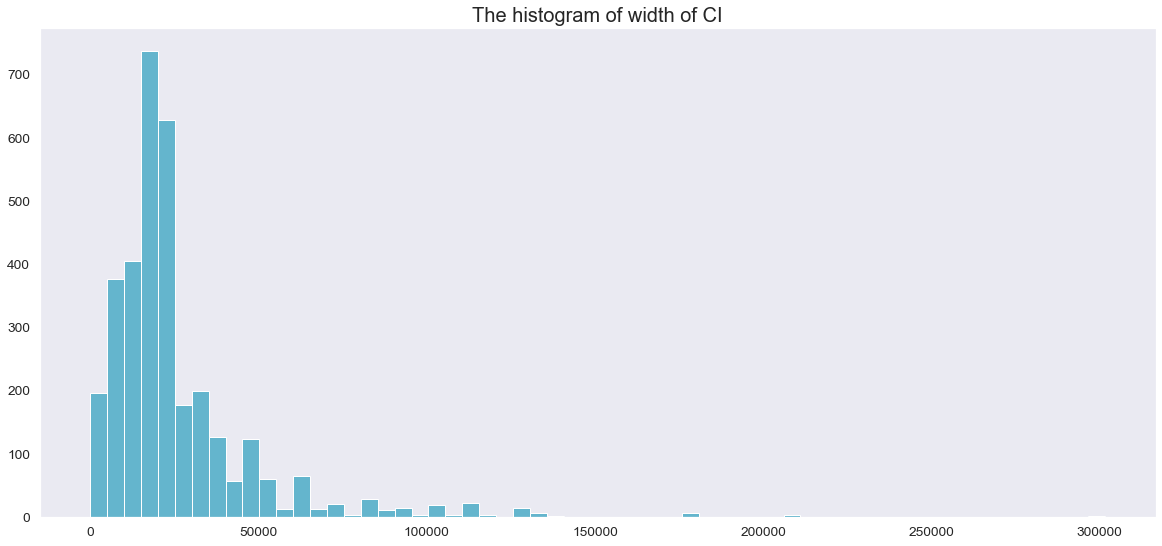

In [129]:
plt.figure(figsize=(20,9))
plt.hist(x=len_sort, bins=60,color = "c",ec = "white") 
plt.grid(False)
plt.title('The histogram of width of CI',fontsize=20)
plt.show()

In [29]:
data_all['CI_label'] = None
for i in range(len(data_all)):
    left = data_all.iloc[i,28]
    right = data_all.iloc[i,29]
    pred = data_all.iloc[i,31]
    if pred<=right and pred>=left:
        data_all.iloc[i,32] = True
    else:
        data_all.iloc[i,32] = False
data_all

Variant  Variant_number    length  Country_digit          GDP  type  \
0       Ovni 395       -0.099432 -0.813886             21  34768.17590     0   
1     38 Cruiser       -0.104543 -1.474761             15  10634.23578     0   
2     38 Cruiser       -0.104543 -1.474761             15  10634.23578     0   
3     38 Cruiser       -0.104543 -1.474761             15  10634.23578     0   
4     38 Cruiser       -0.104543 -1.474761             15  10634.23578     0   
...          ...             ...       ...            ...          ...   ...   
3356          50       -0.063654  0.728155             25  19144.28439     1   
3357          50       -0.063654  0.728155             25  19144.28439     1   
3358         5.4       -0.050024  2.380342             25  19144.28439     1   
3359         5.4       -0.050024  2.380342             34  33673.75096     1   
3360    Series 5       -0.063654  2.490488             20  49813.00000     1   

      Caribbean  Europe  USA  2005  ...  2019  MV_expensive  C_expensive  \
0             0       1    0     1  ...     0             0            0   
1             0       1    0     1  ...     0            -1            0   
2             0       1    0     1  ...     0            -1            0   
3             0       1    0     1  ...     0            -1            0   
4             0       1    0     1  ...     0            -1            0   
...         ...     ...  ...   ...  ...   ...           ...          ...   
3356          0       1    0     0  ...     1             0            0   
3357          0       1    0     0  ...     1             0            0   
3358          0       1    0     0  ...     1             0            0   
3359          0       1    0     0  ...     1             0            0   
3360          0       0    1     0  ...     1             0            0   

      Variant_transform  Listing Price (USD)        CI_left      CI_right  \
0                   339               267233  188673.725270  3.943429e+05   
1                    17                75178   68293.198267  8.617880e+04   
2                    17                66825   68293.198267  8.617880e+04   
3                    17                54661   68293.198267  8.617880e+04   
4                    17                53447   68293.198267  8.617880e+04   
...                 ...                  ...            ...           ...   
3356                188               789584  371981.473654  5.413090e+05   
3357                188               788937  371981.473654  5.413090e+05   
3358                187              1246325  727168.259615  1.330300e+06   
3359                187               811143  727168.259615  1.330300e+06   
3360                365              1495000  957983.745762  1.316950e+06   

             CI_len       predict  CI_label  
0     102834.608063  2.231017e+05      True  
1       8942.801733  5.481968e+04     False  
2       8942.801733  5.481968e+04     False  
3       8942.801733  5.481968e+04     False  
4       8942.801733  5.481968e+04     False  
...             ...           ...       ...  
3356   84663.767725  8.530613e+05     False  
3357   84663.767725  8.530613e+05     False  
3358  301565.740385  1.133111e+06      True  
3359  301565.740385  9.409244e+05      True  
3360  179483.054238  1.417587e+06     False  

[3347 rows x 33 columns]

In [30]:
a = pd.DataFrame(data_all['CI_label'].value_counts().sort_values())
a

CI_label
True       1229
False      2118

In [31]:
a_sum = data_all.groupby('Variant').agg({'CI_label':Counter})
a_sum

CI_label
Variant                        
115         {True: 3, False: 2}
1160                  {True: 2}
1190 Sport           {False: 1}
12                    {True: 3}
1200                 {False: 1}
...                         ...
Xp 38       {False: 1, True: 2}
Xp 44       {False: 4, True: 1}
Y 40                  {True: 3}
harmony 52           {False: 3}
rm 12.60             {False: 2}

[434 rows x 1 columns]

In [32]:
proportion = []
for i in range(len(a_sum)):
    dic = dict(a_sum.iloc[i,0])
    variant = a_sum.index[i]
#     print(dic.keys())
    if True in dic.keys() and False in dic.keys():
        ints = dic[True]/(dic[False]+dic[True])
        proportion.append(ints)
    elif True not in dic.keys() and False in dic.keys():
        proportion.append(0)
    elif False not in dic.keys() and True in dic.keys():
        proportion.append(1)
proportion

[0.6,
 1,
 0,
 1,
 0,
 0,
 0,
 0.5,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0.32142857142857145,
 0,
 0.5454545454545454,
 0.5217391304347826,
 0,
 0.6666666666666666,
 0,
 1,
 0.7894736842105263,
 0.8,
 0,
 0.75,
 0,
 0.13725490196078433,
 0.22727272727272727,
 1,
 0.5,
 0,
 0,
 0.75,
 0.375,
 0.35714285714285715,
 0,
 0.3333333333333333,
 0,
 0.09523809523809523,
 0,
 0,
 0.21428571428571427,
 0,
 0.5,
 0,
 0.3157894736842105,
 1,
 0.5,
 0,
 0.6666666666666666,
 0.2,
 0,
 0,
 0,
 0.3076923076923077,
 0,
 0.6666666666666666,
 0,
 0,
 0.6666666666666666,
 0,
 0.9,
 0,
 0.3333333333333333,
 0.3,
 0,
 0,
 0.5217391304347826,
 0.6428571428571429,
 0,
 0,
 0.42857142857142855,
 0.625,
 1,
 0.3333333333333333,
 0.4444444444444444,
 0.6666666666666666,
 0.4444444444444444,
 1,
 0.4105263157894737,
 0.18181818181818182,
 0,
 0,
 0.2222222222222222,
 0,
 0.6666666666666666,
 0.5,
 0.75,
 0,
 0,
 0,
 0.41935483870967744,
 0.47368421052631576,
 0.75,
 1,
 0.75,
 0,
 0,
 0.47058823529411764,
 0,
 0,
 0,
 0,

In [33]:
a_sum['proportion'] = proportion
a_sum

CI_label  proportion
Variant                                    
115         {True: 3, False: 2}    0.600000
1160                  {True: 2}    1.000000
1190 Sport           {False: 1}    0.000000
12                    {True: 3}    1.000000
1200                 {False: 1}    0.000000
...                         ...         ...
Xp 38       {False: 1, True: 2}    0.666667
Xp 44       {False: 4, True: 1}    0.200000
Y 40                  {True: 3}    1.000000
harmony 52           {False: 3}    0.000000
rm 12.60             {False: 2}    0.000000

[434 rows x 2 columns]

In [34]:
a_sum.to_csv('variant_CI.csv')

### all data truncated

In [146]:
variant = list(data_truncate["Variant"].unique())
#print(variant)
#print(df)
df2 = data_truncate["Variant"]
cfdc_itv = []
z = 1.96
for i in variant:
    lst = list(data_truncate.loc[data_truncate["Variant"] == i]["Listing Price (USD)"])
    #print(lst)
    #print(type(lst))
    m = np.mean(lst)
    st = np.std(lst)
    #st.norm.interval(alpha=0.95, df=len(lst)-1, loc=np.mean(lst), scale=st.sem(lst)) 
    cfdc_itv.append([m-z*st/np.sqrt(len(lst)),m+z*st/np.sqrt(len(lst))])
#print(cfdc_itv)

res = {}
for i in range(len(cfdc_itv)):
    res[variant[i]]=cfdc_itv[i]
#print(res)
    
CI_col1t = []
CI_col2t = []
CI_lent = []

for j in range(len(df2)):

    idx = variant.index(df2.iloc[j])
    
    CI_col1t.append(cfdc_itv[idx][0])
    CI_col2t.append(cfdc_itv[idx][1])
    CI_lent.append((cfdc_itv[idx][1]-cfdc_itv[idx][0])/2)
    
print(CI_col1t,'/n',
    CI_col2t,'/n',
    CI_lent)

[188673.72527021292, 68293.19826716222, 68293.19826716222, 68293.19826716222, 68293.19826716222, 68293.19826716222, 79800.95757688401, 53427.756264524636, 53427.756264524636, 97176.42160042003, 97176.42160042003, 97176.42160042003, 97176.42160042003, 144127.18530524377, 144127.18530524377, 144127.18530524377, 144127.18530524377, 144127.18530524377, 144127.18530524377, 144127.18530524377, 144127.18530524377, 144127.18530524377, 144127.18530524377, 144127.18530524377, 144127.18530524377, 144127.18530524377, 135483.15658940384, 135483.15658940384, 135483.15658940384, 135483.15658940384, 95048.96738680812, 95048.96738680812, 105774.25140001634, 82321.22483671369, 82321.22483671369, 105774.25140001634, 82321.22483671369, 82321.22483671369, 82321.22483671369, 82321.22483671369, 82321.22483671369, 82321.22483671369, 82321.22483671369, 144292.07046379594, 98517.50582587288, 98517.50582587288, 98517.50582587288, 96952.56480408424, 96952.56480408424, 96952.56480408424, 144292.07046379594, 118804

In [147]:
predict = gridt.predict(xt)
data_truncate["CI_left"] = CI_col1t
data_truncate["CI_right"] = CI_col2t
data_truncate["CI_len"] = CI_lent
data_truncate['predict'] = predict
data_truncate

Variant  Variant_number    length  Country_digit          GDP  type  \
0       Ovni 395       -0.099432 -0.813886             21  34768.17590     0   
1     38 Cruiser       -0.104543 -1.474761             15  10634.23578     0   
2     38 Cruiser       -0.104543 -1.474761             15  10634.23578     0   
3     38 Cruiser       -0.104543 -1.474761             15  10634.23578     0   
4     38 Cruiser       -0.104543 -1.474761             15  10634.23578     0   
...          ...             ...       ...            ...          ...   ...   
3356          50       -0.063654  0.728155             25  19144.28439     1   
3357          50       -0.063654  0.728155             25  19144.28439     1   
3358         5.4       -0.050024  2.380342             25  19144.28439     1   
3359         5.4       -0.050024  2.380342             34  33673.75096     1   
3360    Series 5       -0.063654  2.490488             20  49813.00000     1   

      2005  2006  2007  2008  ...  2017  2018  2019  MV_expensive  \
0        1     0     0     0  ...     0     0     0             0   
1        1     0     0     0  ...     0     0     0            -1   
2        1     0     0     0  ...     0     0     0            -1   
3        1     0     0     0  ...     0     0     0            -1   
4        1     0     0     0  ...     0     0     0            -1   
...    ...   ...   ...   ...  ...   ...   ...   ...           ...   
3356     0     0     0     0  ...     0     0     1             0   
3357     0     0     0     0  ...     0     0     1             0   
3358     0     0     0     0  ...     0     0     1             0   
3359     0     0     0     0  ...     0     0     1             0   
3360     0     0     0     0  ...     0     0     1             0   

      C_expensive  Listing Price (USD)        CI_left      CI_right  \
0               0               267233  188673.725270  3.943429e+05   
1               0                75178   68293.198267  8.617880e+04   
2               0                66825   68293.198267  8.617880e+04   
3               0                54661   68293.198267  8.617880e+04   
4               0                53447   68293.198267  8.617880e+04   
...           ...                  ...            ...           ...   
3356            0               789584  371981.473654  5.413090e+05   
3357            0               788937  371981.473654  5.413090e+05   
3358            0              1246325  727168.259615  1.330300e+06   
3359            0               811143  727168.259615  1.330300e+06   
3360            0              1495000  957983.745762  1.316950e+06   

             CI_len       predict  
0     102834.608063  2.348836e+05  
1       8942.801733  7.064409e+04  
2       8942.801733  7.064409e+04  
3       8942.801733  7.064409e+04  
4       8942.801733  7.064409e+04  
...             ...           ...  
3356   84663.767725  8.187249e+05  
3357   84663.767725  8.187249e+05  
3358  301565.740385  1.225721e+06  
3359  301565.740385  8.308867e+05  
3360  179483.054238  1.505738e+06  

[3347 rows x 26 columns]

In [143]:
print(data_truncate.columns[21])

Listing Price (USD)


In [148]:
mean=np.mean(CI_lent)
print('the mean value of CI width is:',mean)
len_sortt = np.sort(CI_lent)
for i in len_sortt:
    if i != 0:
        print('the least nonzero CI width:',i)
        break

the mean value of CI width is: 25802.671880260874
the least nonzero CI width: 9.008540392314899


In [149]:
pd.DataFrame(len_sortt).describe()

0
count    3347.000000
mean    25802.671880
std     24142.621979
min         0.000000
25%     12966.152120
50%     19452.431218
75%     29330.375477
max    301565.740385

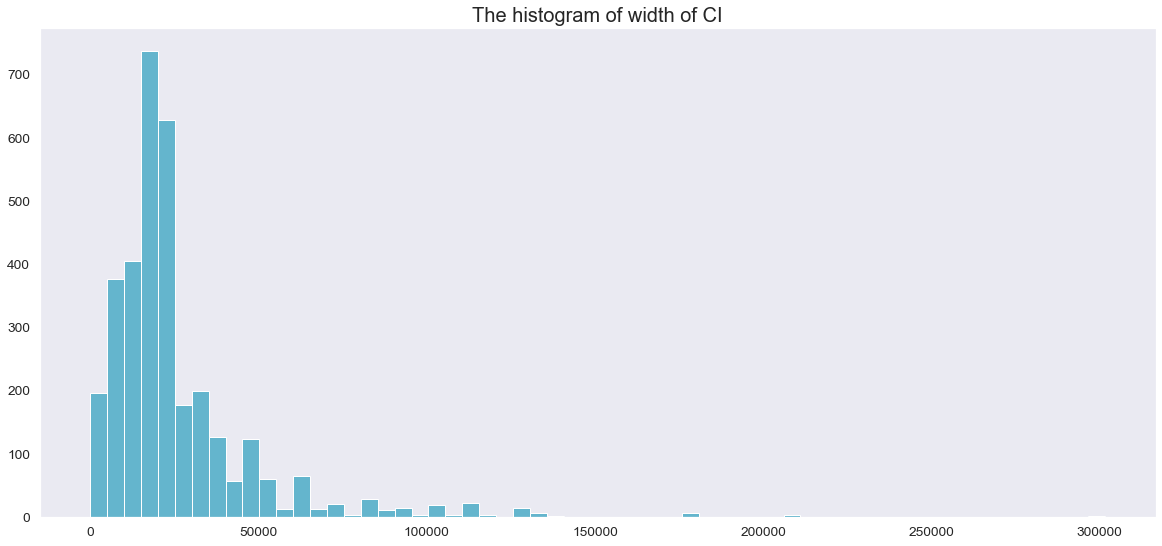

In [150]:
plt.figure(figsize=(20,9))
plt.hist(x=len_sortt, bins=60,color = "c",ec = "white") 
plt.grid(False)
plt.title('The histogram of width of CI',fontsize=20)
plt.show()

In [151]:
data_truncate['CI_label'] = None
for i in range(len(data_all)):
    left = data_truncate.iloc[i,22]
    right = data_truncate.iloc[i,23]
    pred = data_truncate.iloc[i,25]
    if pred<=right and pred>=left:
        data_truncate.iloc[i,26] = True
    else:
        data_truncate.iloc[i,26] = False
data_truncate

Variant  Variant_number    length  Country_digit          GDP  type  \
0       Ovni 395       -0.099432 -0.813886             21  34768.17590     0   
1     38 Cruiser       -0.104543 -1.474761             15  10634.23578     0   
2     38 Cruiser       -0.104543 -1.474761             15  10634.23578     0   
3     38 Cruiser       -0.104543 -1.474761             15  10634.23578     0   
4     38 Cruiser       -0.104543 -1.474761             15  10634.23578     0   
...          ...             ...       ...            ...          ...   ...   
3356          50       -0.063654  0.728155             25  19144.28439     1   
3357          50       -0.063654  0.728155             25  19144.28439     1   
3358         5.4       -0.050024  2.380342             25  19144.28439     1   
3359         5.4       -0.050024  2.380342             34  33673.75096     1   
3360    Series 5       -0.063654  2.490488             20  49813.00000     1   

      2005  2006  2007  2008  ...  2018  2019  MV_expensive  C_expensive  \
0        1     0     0     0  ...     0     0             0            0   
1        1     0     0     0  ...     0     0            -1            0   
2        1     0     0     0  ...     0     0            -1            0   
3        1     0     0     0  ...     0     0            -1            0   
4        1     0     0     0  ...     0     0            -1            0   
...    ...   ...   ...   ...  ...   ...   ...           ...          ...   
3356     0     0     0     0  ...     0     1             0            0   
3357     0     0     0     0  ...     0     1             0            0   
3358     0     0     0     0  ...     0     1             0            0   
3359     0     0     0     0  ...     0     1             0            0   
3360     0     0     0     0  ...     0     1             0            0   

      Listing Price (USD)        CI_left      CI_right         CI_len  \
0                  267233  188673.725270  3.943429e+05  102834.608063   
1                   75178   68293.198267  8.617880e+04    8942.801733   
2                   66825   68293.198267  8.617880e+04    8942.801733   
3                   54661   68293.198267  8.617880e+04    8942.801733   
4                   53447   68293.198267  8.617880e+04    8942.801733   
...                   ...            ...           ...            ...   
3356               789584  371981.473654  5.413090e+05   84663.767725   
3357               788937  371981.473654  5.413090e+05   84663.767725   
3358              1246325  727168.259615  1.330300e+06  301565.740385   
3359               811143  727168.259615  1.330300e+06  301565.740385   
3360              1495000  957983.745762  1.316950e+06  179483.054238   

           predict  CI_label  
0     2.348836e+05      True  
1     7.064409e+04      True  
2     7.064409e+04      True  
3     7.064409e+04      True  
4     7.064409e+04      True  
...            ...       ...  
3356  8.187249e+05     False  
3357  8.187249e+05     False  
3358  1.225721e+06      True  
3359  8.308867e+05      True  
3360  1.505738e+06     False  

[3347 rows x 27 columns]

In [152]:
b = pd.DataFrame(data_truncate['CI_label'].value_counts().sort_values())
b

CI_label
True       1165
False      2182

### data_no_duplicate

In [159]:
variant = list(data_no_duplicate["Variant"].unique())
#print(variant)
#print(df)
df2 = data_no_duplicate["Variant"]
cfdc_itv = []
z = 1.96
for i in variant:
    lst = list(data_no_duplicate.loc[data_no_duplicate["Variant"] == i]["Listing Price (USD)"])
    #print(lst)
    #print(type(lst))
    m = np.mean(lst)
    st = np.std(lst)
    #st.norm.interval(alpha=0.95, df=len(lst)-1, loc=np.mean(lst), scale=st.sem(lst)) 
    cfdc_itv.append([m-z*st/np.sqrt(len(lst)),m+z*st/np.sqrt(len(lst))])
#print(cfdc_itv)

res = {}
for i in range(len(cfdc_itv)):
    res[variant[i]]=cfdc_itv[i]
#print(res)
    
CI_col12 = []
CI_col22 = []
CI_len2 = []

for j in range(len(df2)):

    idx = variant.index(df2.iloc[j])
    
    CI_col12.append(cfdc_itv[idx][0])
    CI_col22.append(cfdc_itv[idx][1])
    CI_len2.append((cfdc_itv[idx][1]-cfdc_itv[idx][0])/2)
    
print(CI_col12,'/n',
    CI_col22,'/n',
    CI_len2)

[100985.38591892502, 143356.36306351426, 143356.36306351426, 143356.36306351426, 143356.36306351426, 143356.36306351426, 152772.56939370546, 100160.91699582864, 100160.91699582864, 129958.07171646532, 129958.07171646532, 129958.07171646532, 129958.07171646532, 210091.11069287185, 210091.11069287185, 210091.11069287185, 210091.11069287185, 210091.11069287185, 210091.11069287185, 210091.11069287185, 210091.11069287185, 210091.11069287185, 210091.11069287185, 210091.11069287185, 221733.20934648518, 221733.20934648518, 221733.20934648518, 221733.20934648518, 107368.80581736218, 107368.80581736218, 29656.590609850085, 189200.23784827522, 189200.23784827522, 29656.590609850085, 189200.23784827522, 189200.23784827522, 189200.23784827522, 189200.23784827522, 189200.23784827522, 189200.23784827522, 204720.905244939, 80322.13300241953, 80322.13300241953, 80322.13300241953, 151803.37183225004, 151803.37183225004, 151803.37183225004, 204720.905244939, 230828.71150127222, 151803.37183225004, 80322.

In [161]:
predict = grid2.predict(x2)
data_no_duplicate["CI_left"] = CI_col12
data_no_duplicate["CI_right"] = CI_col22
data_no_duplicate["CI_len"] = CI_len2
data_no_duplicate['predict'] = predict
data_no_duplicate

Variant  Variant_number    length  Country_digit          GDP  type  \
0       Ovni 395       -0.194840 -1.474761             11  47970.21429     0   
1     38 Cruiser       -0.194840 -1.474761             41  50801.50000     0   
2     38 Cruiser       -0.194840 -1.474761             70  43473.00000     0   
3     38 Cruiser       -0.194840 -1.474761             78  43194.00000     0   
4     38 Cruiser       -0.194840 -1.474761             11  47970.21429     0   
...          ...             ...       ...            ...          ...   ...   
3350          46       14.417968 -0.373303             20  45928.00000     0   
3351          46       14.417968 -0.373303             58  47653.00000     0   
3352         50F       14.758712  0.067280             47  41994.71353     0   
3353         50F       14.758712  0.067280             58  46960.57143     0   
3354         50F       14.758712  0.067280             13  58218.00000     0   

      Caribbean  Europe  USA  2005  ...  2017  2018  2019  MV_expensive  \
0             0       0    1     0  ...     0     0     0             0   
1             0       0    1     0  ...     0     0     0             0   
2             0       0    1     0  ...     0     0     0             0   
3             0       0    1     0  ...     0     0     0             0   
4             0       0    1     0  ...     0     0     0             0   
...         ...     ...  ...   ...  ...   ...   ...   ...           ...   
3350          0       0    1     0  ...     1     0     0             0   
3351          0       0    1     0  ...     0     1     0             0   
3352          0       1    0     1  ...     0     0     0             0   
3353          0       0    1     1  ...     0     0     0             0   
3354          0       0    1     0  ...     0     0     0             0   

      C_expensive  Listing Price (USD)        CI_left       CI_right  \
0               0             129900.0  100985.385919  447698.614081   
1               0             129000.0  143356.363064  168422.364209   
2               0             134900.0  143356.363064  168422.364209   
3               0             165000.0  143356.363064  168422.364209   
4               0             144900.0  143356.363064  168422.364209   
...           ...                  ...            ...            ...   
3350            0             485000.0  191496.087415  284556.594403   
3351            1             497000.0  191496.087415  284556.594403   
3352            0             302459.0  308321.100966  355984.899034   
3353            1             345000.0  308321.100966  355984.899034   
3354            0             349000.0  308321.100966  355984.899034   

             CI_len        predict  
0     173356.614081  130372.598468  
1      12533.000573  118873.749649  
2      12533.000573  124142.735586  
3      12533.000573  149132.792719  
4      12533.000573  130372.598468  
...             ...            ...  
3350   46530.253494  431417.916446  
3351   46530.253494  542882.750714  
3352   23831.899034  294582.096841  
3353   23831.899034  375780.817189  
3354   23831.899034  341475.820741  

[3005 rows x 31 columns]

In [163]:
print(data_no_duplicate.columns[26])

Listing Price (USD)


In [166]:
mean=np.mean(CI_len2)
print('the mean value of CI width is:',mean)
len_sort2 = np.sort(CI_len2)
for i in len_sort2:
    if i != 0:
        print('the least nonzero CI width:',i)
        break

the mean value of CI width is: 66924.73845542844
the least nonzero CI width: 3742.7020506847766


In [165]:
pd.DataFrame(len_sort2).describe()

0
count    3005.000000
mean    66924.738455
std     44917.634543
min         0.000000
25%     37671.226954
50%     58844.208800
75%     81170.306942
max    432530.514680

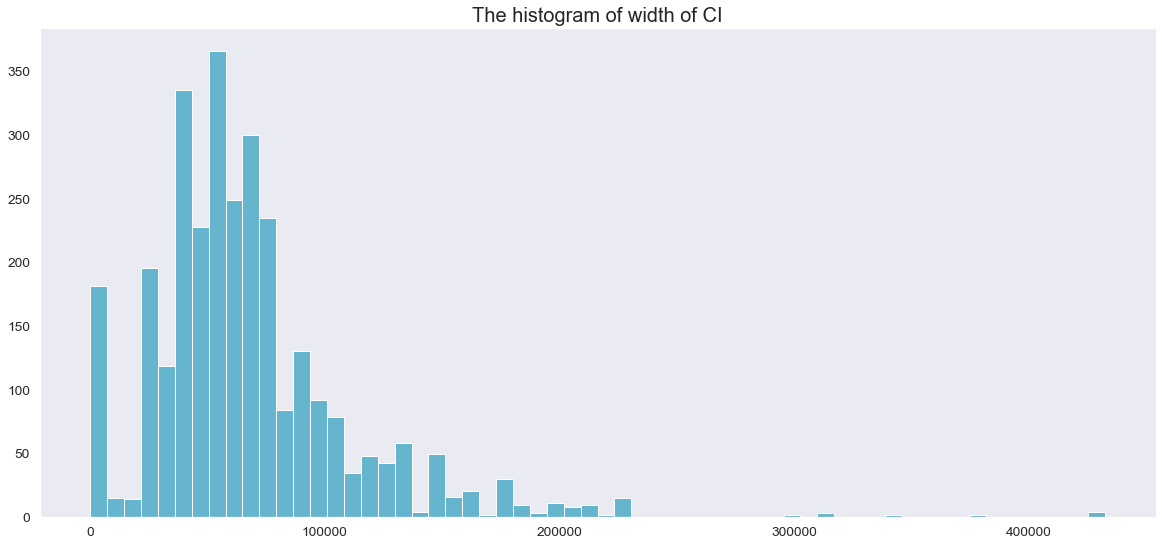

In [167]:
plt.figure(figsize=(20,9))
plt.hist(x=len_sort2, bins=60,color = "c",ec = "white") 
plt.grid(False)
plt.title('The histogram of width of CI',fontsize=20)
plt.show()

In [169]:
data_no_duplicate['CI_label'] = None
for i in range(len(data_no_duplicate)):
    left = data_no_duplicate.iloc[i,27]
    right = data_no_duplicate.iloc[i,28]
    pred = data_no_duplicate.iloc[i,30]
    if pred<=right and pred>=left:
        data_no_duplicate.iloc[i,31] = True
    else:
        data_no_duplicate.iloc[i,31] = False
data_no_duplicate

Variant  Variant_number    length  Country_digit          GDP  type  \
0       Ovni 395       -0.194840 -1.474761             11  47970.21429     0   
1     38 Cruiser       -0.194840 -1.474761             41  50801.50000     0   
2     38 Cruiser       -0.194840 -1.474761             70  43473.00000     0   
3     38 Cruiser       -0.194840 -1.474761             78  43194.00000     0   
4     38 Cruiser       -0.194840 -1.474761             11  47970.21429     0   
...          ...             ...       ...            ...          ...   ...   
3350          46       14.417968 -0.373303             20  45928.00000     0   
3351          46       14.417968 -0.373303             58  47653.00000     0   
3352         50F       14.758712  0.067280             47  41994.71353     0   
3353         50F       14.758712  0.067280             58  46960.57143     0   
3354         50F       14.758712  0.067280             13  58218.00000     0   

      Caribbean  Europe  USA  2005  ...  2018  2019  MV_expensive  \
0             0       0    1     0  ...     0     0             0   
1             0       0    1     0  ...     0     0             0   
2             0       0    1     0  ...     0     0             0   
3             0       0    1     0  ...     0     0             0   
4             0       0    1     0  ...     0     0             0   
...         ...     ...  ...   ...  ...   ...   ...           ...   
3350          0       0    1     0  ...     0     0             0   
3351          0       0    1     0  ...     1     0             0   
3352          0       1    0     1  ...     0     0             0   
3353          0       0    1     1  ...     0     0             0   
3354          0       0    1     0  ...     0     0             0   

      C_expensive  Listing Price (USD)        CI_left       CI_right  \
0               0                 True  100985.385919  447698.614081   
1               0                 True  143356.363064  168422.364209   
2               0                 True  143356.363064  168422.364209   
3               0                 True  143356.363064  168422.364209   
4               0                 True  143356.363064  168422.364209   
...           ...                  ...            ...            ...   
3350            0                 True  191496.087415  284556.594403   
3351            1                False  191496.087415  284556.594403   
3352            0                 True  308321.100966  355984.899034   
3353            1                False  308321.100966  355984.899034   
3354            0                 True  308321.100966  355984.899034   

             CI_len        predict  CI_label  
0     173356.614081  130372.598468      True  
1      12533.000573  118873.749649     False  
2      12533.000573  124142.735586     False  
3      12533.000573  149132.792719      True  
4      12533.000573  130372.598468     False  
...             ...            ...       ...  
3350   46530.253494  431417.916446     False  
3351   46530.253494  542882.750714     False  
3352   23831.899034  294582.096841     False  
3353   23831.899034  375780.817189     False  
3354   23831.899034  341475.820741      True  

[3005 rows x 32 columns]

In [170]:
c = pd.DataFrame(data_no_duplicate['CI_label'].value_counts().sort_values())
c

CI_label
True        969
False      2036

### data_var

In [171]:
variant = list(data_var["Variant"].unique())
#print(variant)
#print(df)
df3 = data_var["Variant"]
cfdc_itv = []
z = 1.96
for i in variant:
    lst = list(data_var.loc[data_var["Variant"] == i]["Listing Price (USD)"])
    #print(lst)
    #print(type(lst))
    m = np.mean(lst)
    st = np.std(lst)
    #st.norm.interval(alpha=0.95, df=len(lst)-1, loc=np.mean(lst), scale=st.sem(lst)) 
    cfdc_itv.append([m-z*st/np.sqrt(len(lst)),m+z*st/np.sqrt(len(lst))])
#print(cfdc_itv)

res = {}
for i in range(len(cfdc_itv)):
    res[variant[i]]=cfdc_itv[i]
#print(res)
    
CI_col13 = []
CI_col23 = []
CI_len3 = []

for j in range(len(df3)):

    idx = variant.index(df3.iloc[j])
    
    CI_col13.append(cfdc_itv[idx][0])
    CI_col23.append(cfdc_itv[idx][1])
    CI_len3.append((cfdc_itv[idx][1]-cfdc_itv[idx][0])/2)
    
print(CI_col13,'/n',
    CI_col23,'/n',
    CI_len3)

[188673.72527021292, 68293.19826716222, 68293.19826716222, 68293.19826716222, 68293.19826716222, 68293.19826716222, 79800.95757688401, 53427.756264524636, 53427.756264524636, 97176.42160042003, 97176.42160042003, 97176.42160042003, 97176.42160042003, 144127.18530524377, 144127.18530524377, 144127.18530524377, 144127.18530524377, 144127.18530524377, 144127.18530524377, 144127.18530524377, 144127.18530524377, 144127.18530524377, 144127.18530524377, 144127.18530524377, 144127.18530524377, 144127.18530524377, 135483.15658940384, 135483.15658940384, 135483.15658940384, 135483.15658940384, 95048.96738680812, 95048.96738680812, 105774.25140001634, 82321.22483671369, 82321.22483671369, 105774.25140001634, 82321.22483671369, 82321.22483671369, 82321.22483671369, 82321.22483671369, 82321.22483671369, 82321.22483671369, 82321.22483671369, 144292.07046379594, 98517.50582587288, 98517.50582587288, 98517.50582587288, 96952.56480408424, 96952.56480408424, 96952.56480408424, 144292.07046379594, 118804

In [172]:
predict = grid3.predict(x3)
data_var["CI_left"] = CI_col13
data_var["CI_right"] = CI_col23
data_var["CI_len"] = CI_len3
data_var['predict'] = predict
data_var

Variant  Variant_number    length  Country_digit          GDP  type  \
0       Ovni 395       -0.099432 -0.813886             21  34768.17590     0   
1     38 Cruiser       -0.104543 -1.474761             15  10634.23578     0   
2     38 Cruiser       -0.104543 -1.474761             15  10634.23578     0   
3     38 Cruiser       -0.104543 -1.474761             15  10634.23578     0   
4     38 Cruiser       -0.104543 -1.474761             15  10634.23578     0   
...          ...             ...       ...            ...          ...   ...   
3189          50       -0.063654  0.728155             25  19144.28439     1   
3190          50       -0.063654  0.728155             25  19144.28439     1   
3191         5.4       -0.050024  2.380342             25  19144.28439     1   
3192         5.4       -0.050024  2.380342             34  33673.75096     1   
3193    Series 5       -0.063654  2.490488             20  49813.00000     1   

      Caribbean  Europe  USA  2005  ...  2017  2018  2019  MV_expensive  \
0             0       1    0     1  ...     0     0     0             0   
1             0       1    0     1  ...     0     0     0            -1   
2             0       1    0     1  ...     0     0     0            -1   
3             0       1    0     1  ...     0     0     0            -1   
4             0       1    0     1  ...     0     0     0            -1   
...         ...     ...  ...   ...  ...   ...   ...   ...           ...   
3189          0       1    0     0  ...     0     0     1             0   
3190          0       1    0     0  ...     0     0     1             0   
3191          0       1    0     0  ...     0     0     1             0   
3192          0       1    0     0  ...     0     0     1             0   
3193          0       0    1     0  ...     0     0     1             0   

      C_expensive  Listing Price (USD)        CI_left      CI_right  \
0               0               267233  188673.725270  3.943429e+05   
1               0                75178   68293.198267  8.617880e+04   
2               0                66825   68293.198267  8.617880e+04   
3               0                54661   68293.198267  8.617880e+04   
4               0                53447   68293.198267  8.617880e+04   
...           ...                  ...            ...           ...   
3189            0               789584  371981.473654  5.413090e+05   
3190            0               788937  371981.473654  5.413090e+05   
3191            0              1246325  727168.259615  1.330300e+06   
3192            0               811143  727168.259615  1.330300e+06   
3193            0              1495000  957983.745762  1.316950e+06   

             CI_len       predict  
0     102834.608063  2.272742e+05  
1       8942.801733  7.428081e+04  
2       8942.801733  7.428081e+04  
3       8942.801733  7.428081e+04  
4       8942.801733  7.428081e+04  
...             ...           ...  
3189   84663.767725  8.221573e+05  
3190   84663.767725  8.221573e+05  
3191  301565.740385  1.222359e+06  
3192  301565.740385  1.247957e+06  
3193  179483.054238  1.493783e+06  

[3183 rows x 31 columns]

In [173]:
print(data_var.columns[26])

Listing Price (USD)


In [174]:
mean=np.mean(CI_len3)
print('the mean value of CI width is:',mean)
len_sort3 = np.sort(CI_len3)
for i in len_sort3:
    if i != 0:
        print('the least nonzero CI width:',i)
        break

the mean value of CI width is: 27132.12151531045
the least nonzero CI width: 9.008540392314899


In [176]:
pd.DataFrame(len_sort3).describe()

0
count    3183.000000
mean    27132.121515
std     24017.180175
min         0.000000
25%     14639.625325
50%     20424.518542
75%     32185.701677
max    301565.740385

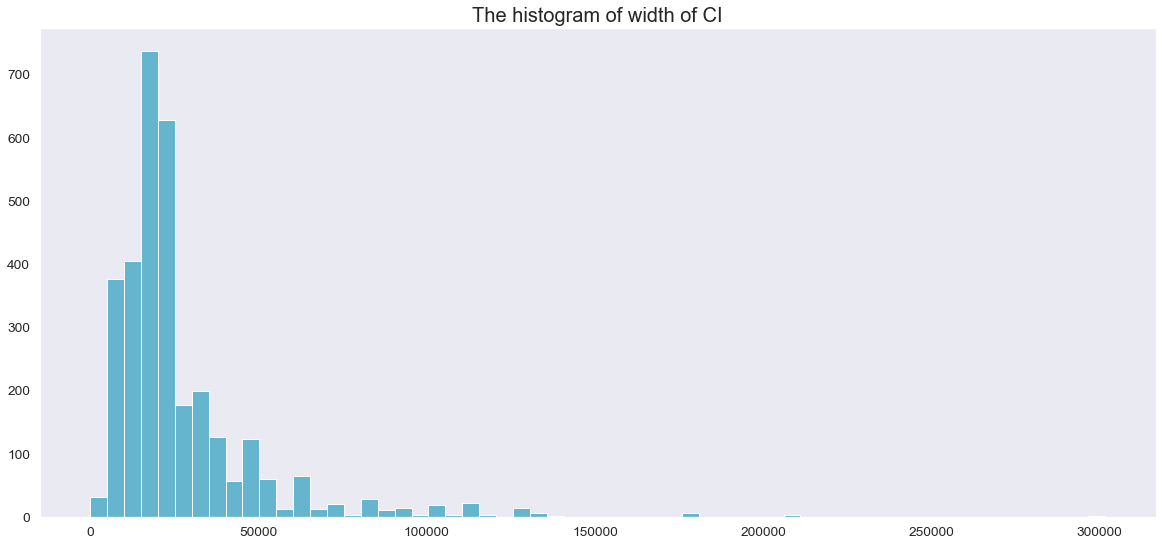

In [175]:
plt.figure(figsize=(20,9))
plt.hist(x=len_sort3, bins=60,color = "c",ec = "white") 
plt.grid(False)
plt.title('The histogram of width of CI',fontsize=20)
plt.show()

In [177]:
data_var['CI_label'] = None
for i in range(len(data_var)):
    left = data_var.iloc[i,27]
    right = data_var.iloc[i,28]
    pred = data_var.iloc[i,30]
    if pred<=right and pred>=left:
        data_var.iloc[i,31] = True
    else:
        data_var.iloc[i,31] = False
data_var

Variant  Variant_number    length  Country_digit          GDP  type  \
0       Ovni 395       -0.099432 -0.813886             21  34768.17590     0   
1     38 Cruiser       -0.104543 -1.474761             15  10634.23578     0   
2     38 Cruiser       -0.104543 -1.474761             15  10634.23578     0   
3     38 Cruiser       -0.104543 -1.474761             15  10634.23578     0   
4     38 Cruiser       -0.104543 -1.474761             15  10634.23578     0   
...          ...             ...       ...            ...          ...   ...   
3189          50       -0.063654  0.728155             25  19144.28439     1   
3190          50       -0.063654  0.728155             25  19144.28439     1   
3191         5.4       -0.050024  2.380342             25  19144.28439     1   
3192         5.4       -0.050024  2.380342             34  33673.75096     1   
3193    Series 5       -0.063654  2.490488             20  49813.00000     1   

      Caribbean  Europe  USA  2005  ...  2018  2019  MV_expensive  \
0             0       1    0     1  ...     0     0             0   
1             0       1    0     1  ...     0     0            -1   
2             0       1    0     1  ...     0     0            -1   
3             0       1    0     1  ...     0     0            -1   
4             0       1    0     1  ...     0     0            -1   
...         ...     ...  ...   ...  ...   ...   ...           ...   
3189          0       1    0     0  ...     0     1             0   
3190          0       1    0     0  ...     0     1             0   
3191          0       1    0     0  ...     0     1             0   
3192          0       1    0     0  ...     0     1             0   
3193          0       0    1     0  ...     0     1             0   

      C_expensive  Listing Price (USD)        CI_left      CI_right  \
0               0               267233  188673.725270  3.943429e+05   
1               0                75178   68293.198267  8.617880e+04   
2               0                66825   68293.198267  8.617880e+04   
3               0                54661   68293.198267  8.617880e+04   
4               0                53447   68293.198267  8.617880e+04   
...           ...                  ...            ...           ...   
3189            0               789584  371981.473654  5.413090e+05   
3190            0               788937  371981.473654  5.413090e+05   
3191            0              1246325  727168.259615  1.330300e+06   
3192            0               811143  727168.259615  1.330300e+06   
3193            0              1495000  957983.745762  1.316950e+06   

             CI_len       predict  CI_label  
0     102834.608063  2.272742e+05      True  
1       8942.801733  7.428081e+04      True  
2       8942.801733  7.428081e+04      True  
3       8942.801733  7.428081e+04      True  
4       8942.801733  7.428081e+04      True  
...             ...           ...       ...  
3189   84663.767725  8.221573e+05     False  
3190   84663.767725  8.221573e+05     False  
3191  301565.740385  1.222359e+06      True  
3192  301565.740385  1.247957e+06      True  
3193  179483.054238  1.493783e+06     False  

[3183 rows x 32 columns]

In [178]:
d = pd.DataFrame(data_var['CI_label'].value_counts().sort_values())
d

CI_label
True       1164
False      2019

# Q2

In [38]:
from pdpbox import pdp, get_dataset, info_plots
from sklearn.inspection import partial_dependence,PartialDependenceDisplay
# from sklearn.inspection import plot_partial_dependence,PartialDependenceDisplay

In [35]:
data_all

Variant  Variant_number    length  Country_digit          GDP  type  \
0       Ovni 395       -0.099432 -0.813886             21  34768.17590     0   
1     38 Cruiser       -0.104543 -1.474761             15  10634.23578     0   
2     38 Cruiser       -0.104543 -1.474761             15  10634.23578     0   
3     38 Cruiser       -0.104543 -1.474761             15  10634.23578     0   
4     38 Cruiser       -0.104543 -1.474761             15  10634.23578     0   
...          ...             ...       ...            ...          ...   ...   
3356          50       -0.063654  0.728155             25  19144.28439     1   
3357          50       -0.063654  0.728155             25  19144.28439     1   
3358         5.4       -0.050024  2.380342             25  19144.28439     1   
3359         5.4       -0.050024  2.380342             34  33673.75096     1   
3360    Series 5       -0.063654  2.490488             20  49813.00000     1   

      Caribbean  Europe  USA  2005  ...  2019  MV_expensive  C_expensive  \
0             0       1    0     1  ...     0             0            0   
1             0       1    0     1  ...     0            -1            0   
2             0       1    0     1  ...     0            -1            0   
3             0       1    0     1  ...     0            -1            0   
4             0       1    0     1  ...     0            -1            0   
...         ...     ...  ...   ...  ...   ...           ...          ...   
3356          0       1    0     0  ...     1             0            0   
3357          0       1    0     0  ...     1             0            0   
3358          0       1    0     0  ...     1             0            0   
3359          0       1    0     0  ...     1             0            0   
3360          0       0    1     0  ...     1             0            0   

      Variant_transform  Listing Price (USD)        CI_left      CI_right  \
0                   339               267233  188673.725270  3.943429e+05   
1                    17                75178   68293.198267  8.617880e+04   
2                    17                66825   68293.198267  8.617880e+04   
3                    17                54661   68293.198267  8.617880e+04   
4                    17                53447   68293.198267  8.617880e+04   
...                 ...                  ...            ...           ...   
3356                188               789584  371981.473654  5.413090e+05   
3357                188               788937  371981.473654  5.413090e+05   
3358                187              1246325  727168.259615  1.330300e+06   
3359                187               811143  727168.259615  1.330300e+06   
3360                365              1495000  957983.745762  1.316950e+06   

             CI_len       predict  CI_label  
0     102834.608063  2.231017e+05      True  
1       8942.801733  5.481968e+04     False  
2       8942.801733  5.481968e+04     False  
3       8942.801733  5.481968e+04     False  
4       8942.801733  5.481968e+04     False  
...             ...           ...       ...  
3356   84663.767725  8.530613e+05     False  
3357   84663.767725  8.530613e+05     False  
3358  301565.740385  1.133111e+06      True  
3359  301565.740385  9.409244e+05      True  
3360  179483.054238  1.417587e+06     False  

[3347 rows x 33 columns]

In [36]:
test_ = data_all.loc[:,:]#,columns=data_all.columns[:-1]
test_x = test_.drop(['Listing Price (USD)','CI_left','CI_right','CI_len','predict','CI_label','Variant'],axis=1)
test_x

Variant_number    length  Country_digit          GDP  type  Caribbean  \
0          -0.099432 -0.813886             21  34768.17590     0          0   
1          -0.104543 -1.474761             15  10634.23578     0          0   
2          -0.104543 -1.474761             15  10634.23578     0          0   
3          -0.104543 -1.474761             15  10634.23578     0          0   
4          -0.104543 -1.474761             15  10634.23578     0          0   
...              ...       ...            ...          ...   ...        ...   
3356       -0.063654  0.728155             25  19144.28439     1          0   
3357       -0.063654  0.728155             25  19144.28439     1          0   
3358       -0.050024  2.380342             25  19144.28439     1          0   
3359       -0.050024  2.380342             34  33673.75096     1          0   
3360       -0.063654  2.490488             20  49813.00000     1          0   

      Europe  USA  2005  2006  ...  2013  2014  2015  2016  2017  2018  2019  \
0          1    0     1     0  ...     0     0     0     0     0     0     0   
1          1    0     1     0  ...     0     0     0     0     0     0     0   
2          1    0     1     0  ...     0     0     0     0     0     0     0   
3          1    0     1     0  ...     0     0     0     0     0     0     0   
4          1    0     1     0  ...     0     0     0     0     0     0     0   
...      ...  ...   ...   ...  ...   ...   ...   ...   ...   ...   ...   ...   
3356       1    0     0     0  ...     0     0     0     0     0     0     1   
3357       1    0     0     0  ...     0     0     0     0     0     0     1   
3358       1    0     0     0  ...     0     0     0     0     0     0     1   
3359       1    0     0     0  ...     0     0     0     0     0     0     1   
3360       0    1     0     0  ...     0     0     0     0     0     0     1   

      MV_expensive  C_expensive  Variant_transform  
0                0            0                339  
1               -1            0                 17  
2               -1            0                 17  
3               -1            0                 17  
4               -1            0                 17  
...            ...          ...                ...  
3356             0            0                188  
3357             0            0                188  
3358             0            0                187  
3359             0            0                187  
3360             0            0                365  

[3347 rows x 26 columns]

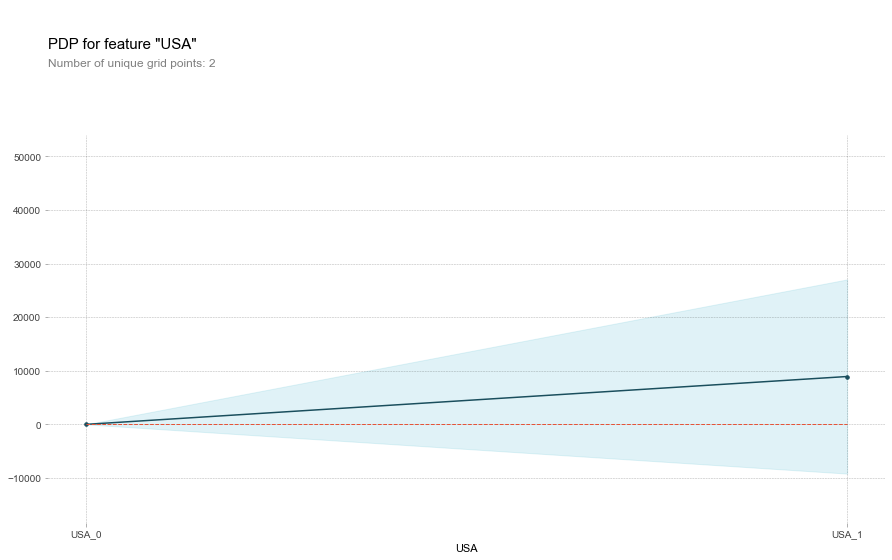

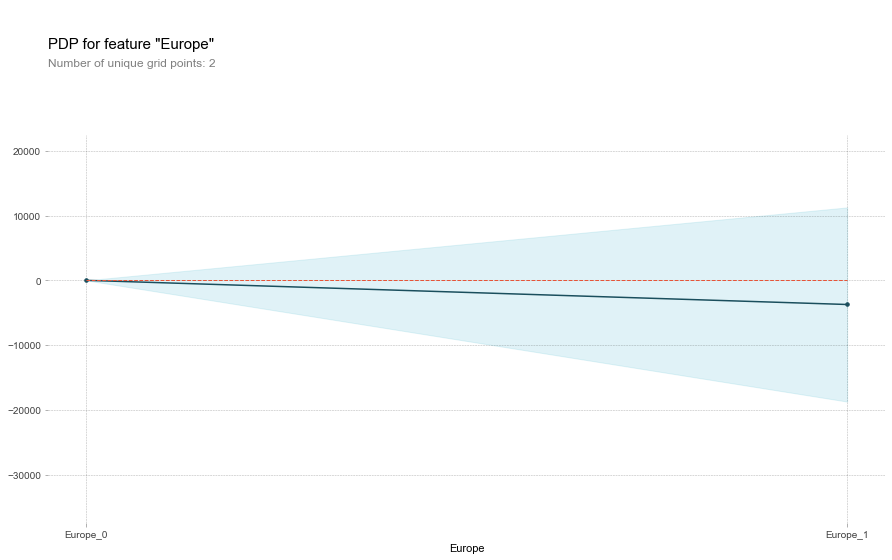

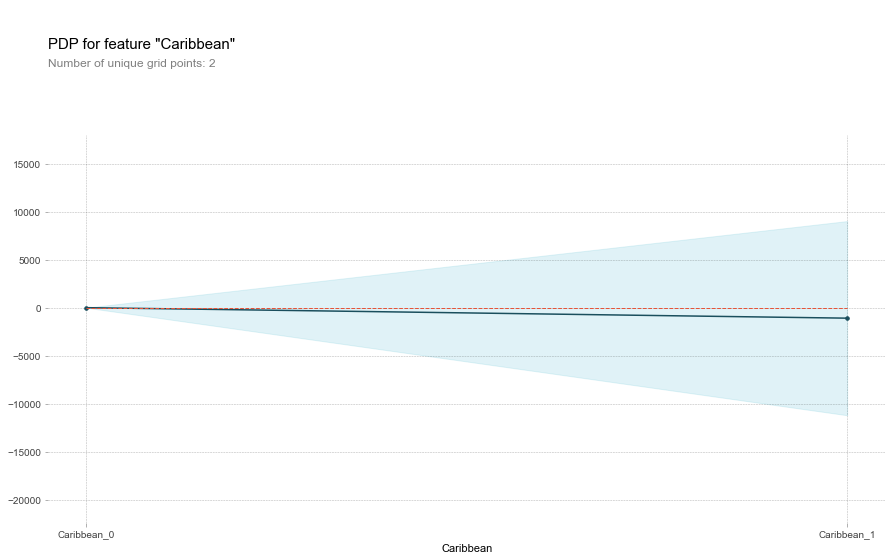

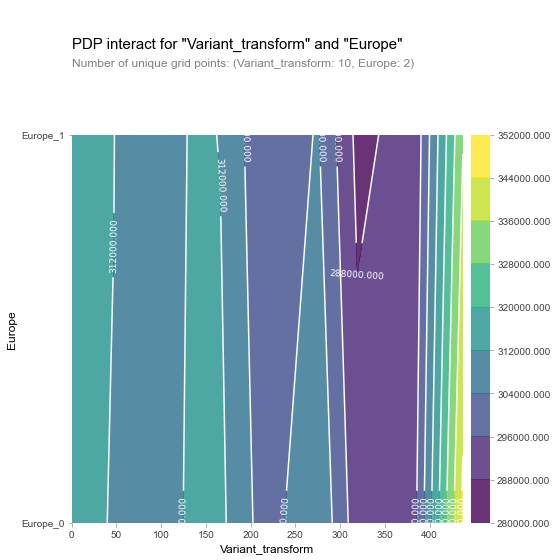

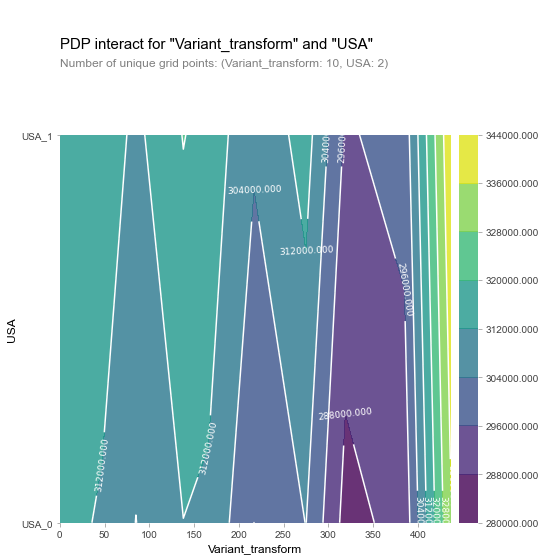

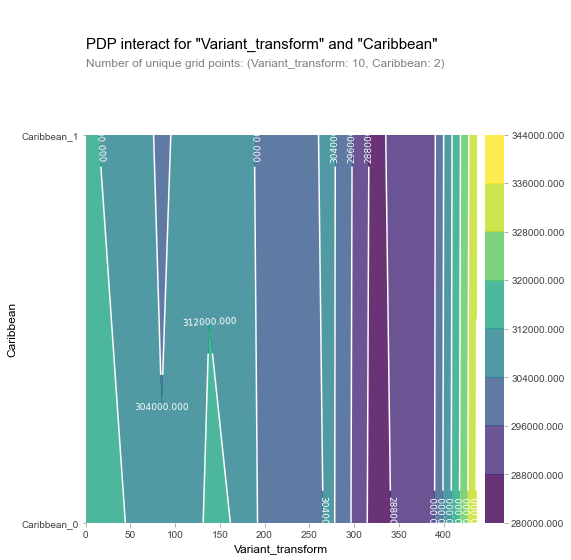

In [41]:
# Plot partial dependence for a single feature
feature_name1 = 'USA'
feature_name2 = 'Europe'
feature_name3 = 'Caribbean'
pdp_dist1 = pdp.pdp_isolate(model=sclf1, dataset=test_x, model_features=test_x.columns, feature=feature_name1)
fig1, axes1 = pdp.pdp_plot(pdp_dist1, feature_name1)

pdp_dist2 = pdp.pdp_isolate(model=sclf1, dataset=test_x, model_features=test_x.columns, feature=feature_name2)
fig2, axes2 = pdp.pdp_plot(pdp_dist2, feature_name2)

pdp_dist3 = pdp.pdp_isolate(model=sclf1, dataset=test_x, model_features=test_x.columns, feature=feature_name3)
fig3, axes3 = pdp.pdp_plot(pdp_dist3, feature_name3)

# Plot 2D partial dependence for two features
features_names1 = ['Variant_transform', 'Europe']
inter1 = pdp.pdp_interact(model=sclf1, dataset=test_x, model_features=test_x.columns, features=features_names1)
fig4, axes4 = pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_names1, plot_type='contour')

features_names2 = ['Variant_transform', 'USA']
inter2 = pdp.pdp_interact(model=sclf1, dataset=test_x, model_features=test_x.columns, features=features_names2)
fig5, axes5 = pdp.pdp_interact_plot(pdp_interact_out=inter2, feature_names=features_names2, plot_type='contour')

features_names3 = ['Variant_transform', 'Caribbean']
inter3 = pdp.pdp_interact(model=sclf1, dataset=test_x, model_features=test_x.columns, features=features_names3)
fig6, axes6 = pdp.pdp_interact_plot(pdp_interact_out=inter3, feature_names=features_names3, plot_type='contour')

# Plot 3D partial dependence for three features
# features_names2 = ['USA', 'Europe', 'Caribbean']
# inter2 = pdp.pdp_interact(model=grid, dataset=test_x, model_features=test_x.columns, features=features_names2)
# fig5, axes5 = pdp.pdp_interact_plot(pdp_interact_out=inter2, feature_names=features_names2, plot_type='contour')

plt.show()

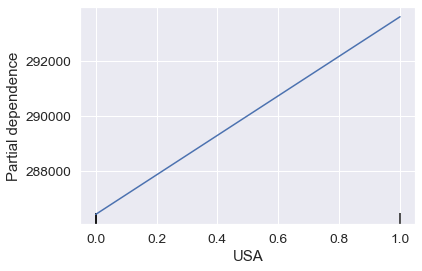

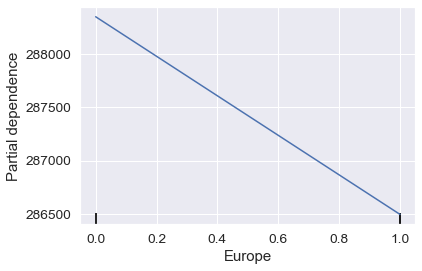

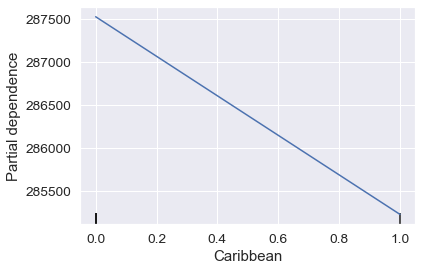

In [107]:
# Plot partial dependence for a single feature
feature_name1 = 'USA'
feature_name2 = 'Europe'
feature_name3 = 'Caribbean'
pdp_dist1 = PartialDependenceDisplay.from_estimator(grid, features=[feature_name1],X=test_x,feature_names=test_x.columns)
# fig1, axes1 = pdp.pdp_plot(pdp_dist1, feature_name1)
pdp_dist2 = PartialDependenceDisplay.from_estimator(grid, features=[feature_name2],X=test_x,feature_names=test_x.columns)
# pdp_dist2 = pdp.pdp_isolate(model=grid, dataset=test_x, model_features=test_x.columns, feature=feature_name2)
# fig2, axes2 = pdp.pdp_plot(pdp_dist2, feature_name2)不
pdp_dist3 = PartialDependenceDisplay.from_estimator(grid, features=[feature_name3],X=test_x,feature_names=test_x.columns)
# pdp_dist3 = pdp.pdp_isolate(model=grid, dataset=test_x, model_features=test_x.columns, feature=feature_name3)
# fig3, axes3 = pdp.pdp_plot(pdp_dist3, feature_name3)

# # Plot 2D partial dependence for two features
# features_names1 = ['USA', 'Europe']
# inter1 = pdp.pdp_interact(model=grid, dataset=test_x, model_features=test_x.columns, features=features_names1)
# fig4, axes4 = pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_names1, plot_type='contour')

# # Plot 3D partial dependence for three features
# features_names2 = ['USA', 'Europe', 'Caribbean']
# inter2 = pdp.pdp_interact(model=grid, dataset=test_x, model_features=test_x.columns, features=features_names2)
# fig5, axes5 = pdp.pdp_interact_plot(pdp_interact_out=inter2, feature_names=features_names2, plot_type='contour')

# plt.show()